# Thermodynamic framework for EVo

This is a thermodynamic framework developed by Kilbride et al. (2016) and refined by Yip et al. (2022).

This notebook processes output from EVo thermodynamic model (Liggins et al., 2020, 2022) to: 
- visualise magma properties as a function of depth (e.g., volatile content in melt, gas volume fraction, density) 
- calculate observable parameters (e.g., SO₂, volume change and displacement, all normalised by per unit volume erupted)

EVo thermodynamic model: https://github.com/pipliggins/EVo

For more information, see:
- Liggins et al. 2020 (https://doi.org/10.1016/j.epsl.2020.116546) 
- Liggins et al., 2022 (https://doi.org/10.1029/2021JE007123) 
- Yip et al., 2022 (https://doi.org/10.1029/2022GC010387)  
- Yip et al., in submission 

||$\mathrm{H_2O}$ (wt%)|$\mathrm{CO_2}$ (wt%)|S (ppm)|$\mathrm{fO_2}$|
|-|-|-|-|-|
|Sensitivity test|10.0$\pm$5.0|2.0$\pm$1.0|3000$\pm$1200|NNO$\pm$1|
|Water-poor rhyolite|5.0|2.0|3000|NNO|
|Water-rich rhyolite|15.0|2.0|3000|NNO|
|Ocean island basalt|1.0|1.0|1600|NNO|
|Arc basalt|3.3|1.0|1600|NNO|
    
||Temperature (K)|Percolation threshold (vol%)|Density（kg$\,$m$^{-3}$）||
|--|--|--|--|--|
|Rhyolite|1123.15|37|2300||
|Basalt|1473.15|17|2800||



## 1. Initialise notebook <a class="anchor" id="Initialisenotebook"></a>

In [1]:
# Set directory
home_dir = input(f"Set home directory (e.g., C:\\Users\\JohnSmith\\EPSL_EVo_framework\\): \n") 


Set home directory (e.g., C:\Users\JohnSmith\EPSL_EVo_framework\): 



In [2]:
# Import packages
import os
import sys
import statistics
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
from IPython.display import display, Markdown, Latex
from math import exp, pi
from pandas import Series, DataFrame


In [3]:
# Define functions

# find nearest value
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# sensitivity figure with 8 panels for rhyolite (with shaded box)
def plot8_sensitivity_rhyolite(
    Pbar1,Pbar2,Pbar3,
    depth1,depth2,depth3,
    min_percolation1,min_percolation2,min_percolation3,res_depth,
    H2O_melt1,CO2_melt1,Stot_melt1,
    H2O_gas1,CO2_gas1,SO2_gas1,
    mS_released1,Exsolv_vol_wt1,RhoBulk1,
    beta_bulk1,rv_bulk1,z_bulk1,
    H2O_melt2,CO2_melt2,Stot_melt2,
    H2O_gas2,CO2_gas2,SO2_gas2,
    mS_released2,Exsolv_vol_wt2,RhoBulk2,
    beta_bulk2,rv_bulk2,z_bulk2,
    H2O_melt3,CO2_melt3,Stot_melt3,
    H2O_gas3,CO2_gas3,SO2_gas3,
    mS_released3,Exsolv_vol_wt3,RhoBulk3,
    beta_bulk3,rv_bulk3,z_bulk3):
    
    rv1 = df_calc[1]['beta_bulk']
    rv2 = df_calc[2]['beta_bulk'] 
    rv3 = df_calc[3]['beta_bulk'] 
    
    fig = plt.figure(figsize=(12, 10), dpi=80)

    # Dissolved magmatic volatile
    ax1 = fig.add_subplot(2, 4, 1)
    ax2 = ax1.twinx()
    ax1.plot(H2O_melt1[0:int(min_percolation1)], Pbar1[0:int(min_percolation1)]/10, c='k', label=sensitivity1)
    ax1.plot(H2O_melt2[0:int(min_percolation2)], Pbar2[0:int(min_percolation2)]/10, c='k', label=sensitivity2, linestyle = 'dashed')
    ax1.plot(H2O_melt3[0:int(min_percolation3)], Pbar3[0:int(min_percolation3)]/10, c='k', label=sensitivity3, linestyle = 'dotted')
    ax1.legend(loc='lower left')
    ax1.plot(H2O_melt1[0:int(min_percolation1)], Pbar1[0:int(min_percolation1)]/10, c='r')
    ax1.plot(CO2_melt1[0:int(min_percolation1)], Pbar1[0:int(min_percolation1)]/10, c='b')
    ax1.plot(Stot_melt1[0:int(min_percolation1)],Pbar1[0:int(min_percolation1)]/10, c='g')
    ax1.plot(H2O_melt1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1]/10, c='silver')
    ax1.plot(CO2_melt1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1]/10, c='silver')
    ax1.plot(Stot_melt1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1]/10, c='silver')
    ax1.plot(H2O_melt2[0:int(min_percolation2)], Pbar2[0:int(min_percolation2)]/10, c='r', linestyle = 'dashed')
    ax1.plot(CO2_melt2[0:int(min_percolation2)], Pbar2[0:int(min_percolation2)]/10, c='b', linestyle = 'dashed')
    ax1.plot(Stot_melt2[0:int(min_percolation2)], Pbar2[0:int(min_percolation2)]/10, c='g', linestyle = 'dashed')    
    ax1.plot(H2O_melt2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1]/10, c='silver', linestyle = 'dashed')
    ax1.plot(CO2_melt2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1]/10, c='silver', linestyle = 'dashed')
    ax1.plot(Stot_melt2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1]/10, c='silver', linestyle = 'dashed')
    ax1.plot(H2O_melt3[0:int(min_percolation3)], Pbar3[0:int(min_percolation3)]/10, c='r', linestyle = 'dotted')
    ax1.plot(CO2_melt3[0:int(min_percolation3)], Pbar3[0:int(min_percolation3)]/10, c='b', linestyle = 'dotted')
    ax1.plot(Stot_melt3[0:int(min_percolation3)], Pbar3[0:int(min_percolation3)]/10, c='g', linestyle = 'dotted')    
    ax1.plot(H2O_melt3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1]/10, c='silver', linestyle = 'dotted')
    ax1.plot(CO2_melt3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1]/10, c='silver', linestyle = 'dotted')
    ax1.plot(Stot_melt3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1]/10, c='silver', linestyle = 'dotted')
    ax1.set_xlabel('Volatile in melt,\n$w^x_{M}$ (wt%)')
    ax1.set_ylabel('Pressure (MPa)')
    ax1.set_xlim(0.0001, 20)
    ax1.set_xscale('log')
    ax1.set_ylim((Pbar3.iloc[-1]-27.45)/10, Pbar3.iloc[0]/10)
    ax1.invert_yaxis()
    ax2.set_ylim(depth3.iloc[-1]-0.1,depth3.iloc[0])
    ax2.axhline(y=res_depth, color='grey', alpha=0.5)
    ax2.invert_yaxis()
    locmaj = mpl.ticker.LogLocator(base=10, numticks=10)
    ax1.xaxis.set_major_locator(locmaj)
    locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=10)
    ax1.xaxis.set_minor_locator(locmin)
    ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax2.set_yticks([])
    ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
    textstr = 'a)'
    props = dict(boxstyle='square', facecolor='white', alpha=1)
    ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
    
    # Exsolved volatile
    ax1 = fig.add_subplot(2, 4, 2)
    ax2 = ax1.twinx()
    ax1.plot(H2O_gas1[0:int(min_percolation1)], Pbar1[0:int(min_percolation1)], c='r', label='H$_2$O')
    ax1.plot(CO2_gas1[0:int(min_percolation1)], Pbar1[0:int(min_percolation1)], c='b', label='CO$_2$')
    ax1.plot(SO2_gas1[0:int(min_percolation1)], Pbar1[0:int(min_percolation1)], c='g', label='SO$_2$')
    ax1.plot(H2O_gas1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1], c='silver')
    ax1.plot(CO2_gas1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1], c='silver')
    ax1.plot(SO2_gas1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1], c='silver')
    ax1.plot(H2O_gas2[0:int(min_percolation2)], Pbar2[0:int(min_percolation2)], c='r', linestyle = 'dashed')
    ax1.plot(CO2_gas2[0:int(min_percolation2)], Pbar2[0:int(min_percolation2)], c='b', linestyle = 'dashed')
    ax1.plot(SO2_gas2[0:int(min_percolation2)], Pbar2[0:int(min_percolation2)], c='g', linestyle = 'dashed')
    ax1.plot(H2O_gas2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1], c='silver', linestyle = 'dashed')
    ax1.plot(CO2_gas2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1], c='silver', linestyle = 'dashed')
    ax1.plot(SO2_gas2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1], c='silver', linestyle = 'dashed')
    ax1.plot(H2O_gas3[0:int(min_percolation3)], Pbar3[0:int(min_percolation3)], c='r', linestyle = 'dotted')
    ax1.plot(CO2_gas3[0:int(min_percolation3)], Pbar3[0:int(min_percolation3)], c='b', linestyle = 'dotted')
    ax1.plot(SO2_gas3[0:int(min_percolation3)], Pbar3[0:int(min_percolation3)], c='g', linestyle = 'dotted')
    ax1.plot(H2O_gas3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1], c='silver', linestyle = 'dotted')
    ax1.plot(CO2_gas3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1], c='silver', linestyle = 'dotted')
    ax1.plot(SO2_gas3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1], c='silver', linestyle = 'dotted')
    ax1.set_xlabel('Volatile in gas,\n$m^x_{g}$ (mol%)')
    ax1.set_xlim(0.000001, 20)
    ax1.set_xscale('log')
    ax1.set_ylim(Pbar3.iloc[-1]-27.45, Pbar3.iloc[0])
    ax1.invert_yaxis()
    ax2.set_ylim(depth3.iloc[-1]-0.1,depth3.iloc[0])
    ax2.axhline(y=res_depth, color='grey', alpha=0.5)
    ax2.invert_yaxis()
    locmaj = mpl.ticker.LogLocator(base=10, numticks=10)
    ax1.xaxis.set_major_locator(locmaj)
    locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=10)
    ax1.xaxis.set_minor_locator(locmin)
    ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax1.set_yticks([])
    ax2.set_yticks([])
    textstr = 'b)'
    props = dict(boxstyle='square', facecolor='white', alpha=1)
    ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

    # Normalised SO2
    ax1 = fig.add_subplot(2, 4, 3)
    ax2 = ax1.twinx()
    ax1.plot(mS_released1[0:int(min_percolation1)], Pbar1[0:int(min_percolation1)], c='k')
    ax1.plot(mS_released2[0:int(min_percolation2)], Pbar2[0:int(min_percolation2)], c='k', linestyle = 'dashed')
    ax1.plot(mS_released3[0:int(min_percolation3)], Pbar3[0:int(min_percolation3)], c='k', linestyle = 'dotted')
    ax1.plot(mS_released1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1], c='silver')
    ax1.plot(mS_released2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1], c='silver', linestyle = 'dashed')
    ax1.plot(mS_released3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1], c='silver', linestyle = 'dotted')
    ax1.set_xlabel('Normalised $\mathrm{SO_2}$,\n' + r'$\overline{S}$ (kg$\,$m$^{-3}$)')
    ax1.set_ylim(Pbar3.iloc[-1]-27.45, Pbar3.iloc[0])
    ax1.invert_yaxis()
    ax2.set_ylim(depth3.iloc[-1]-0.1,depth3.iloc[0])
    ax2.axhline(y=res_depth, color='grey', alpha=0.5)
#     ax2.axvline(x=0.1, color='red', alpha=0.5)
#     ax2.axvline(x=1, color='green', alpha=0.5)
#     ax2.axvline(x=10, color='blue', alpha=0.5)
    ax2.invert_yaxis()
    ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
    ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax1.set_xlim(-1, 11)
    textstr = 'c)'
    props = dict(boxstyle='square', facecolor='white', alpha=1)
    ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
    
    # Total exsolved volatiles
    ax1 = fig.add_subplot(2, 4, 4)
    ax2 = ax1.twinx()
    ax1.plot(Exsolv_vol_wt1[0:int(min_percolation1)], Pbar1[0:int(min_percolation1)], c='k')
    ax1.plot(Exsolv_vol_wt2[0:int(min_percolation2)], Pbar2[0:int(min_percolation2)], c='k', linestyle = 'dashed')
    ax1.plot(Exsolv_vol_wt3[0:int(min_percolation3)], Pbar3[0:int(min_percolation3)], c='k', linestyle = 'dotted')
    ax1.plot(Exsolv_vol_wt1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1], c='silver')
    ax1.plot(Exsolv_vol_wt2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1], c='silver', linestyle = 'dashed')
    ax1.plot(Exsolv_vol_wt3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1], c='silver', linestyle = 'dotted')
    ax1.set_xlabel('Total exsolved\ngas, $V_{g}$ (vol%)')
    ax1.set_ylim(Pbar3.iloc[-1]-27.45, Pbar3.iloc[0])
    ax1.invert_yaxis()
    ax2.set_ylim(depth3.iloc[-1]-0.1,depth3.iloc[0])
    ax2.axhline(y=res_depth, color='grey', alpha=0.5)
    ax2.invert_yaxis()
    ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
    ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
    ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
    ax2.set_ylabel('Depth (km)')
    ax1.set_xlim(-10, 110)
    ax1.set_yticks([])
    textstr = 'd)'
    props = dict(boxstyle='square', facecolor='white', alpha=1)
    ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

    # Density
    ax1 = fig.add_subplot(2, 4, 5)
    ax2 = ax1.twinx()
    ax1.plot(RhoBulk1[1:int(min_percolation1)], Pbar1[1:int(min_percolation1)]/10, c='k')
    ax1.plot(RhoBulk1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1]/10, c='silver')
    ax1.plot(RhoBulk2[1:int(min_percolation2)], Pbar2[1:int(min_percolation2)]/10, c='k', linestyle = 'dashed')
    ax1.plot(RhoBulk2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1]/10, c='silver', linestyle = 'dashed')
    ax1.plot(RhoBulk3[1:int(min_percolation3)], Pbar3[1:int(min_percolation3)]/10, c='k', linestyle = 'dotted')
    ax1.plot(RhoBulk3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1]/10, c='silver', linestyle = 'dotted')
    ax1.set_xlabel('Magma density,\n' + r'$\rho_{m}$ (kg$\,$m$^{-3}$)')
    ax1.set_ylabel('Pressure (MPa)')
    ax1.set_ylim((Pbar3.iloc[-1]-27.45)/10, Pbar3.iloc[0]/10)
    ax1.invert_yaxis()
    ax2.set_ylim(depth3.iloc[-1]-0.1,depth3.iloc[0])
    ax2.axhline(y=res_depth, color='grey', alpha=0.5)
    ax2.invert_yaxis()
    ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1250))
    ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(625))
    ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
    ax1.set_xlim(-100, 2800)
    ax2.set_yticks([])
    textstr = 'e)'
    props = dict(boxstyle='square', facecolor='white', alpha=1)
    ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
    
    # Compressibility
    ax1 = fig.add_subplot(2, 4, 6)
    ax2 = ax1.twinx()
    ax1.plot(beta_bulk1[1:int(min_percolation1):10], Pbar1[1:int(min_percolation1):10], c='k')
    ax1.plot(beta_bulk1[int(min_percolation1):-1:10], Pbar1[int(min_percolation1):-1:10], c='silver')
    ax1.plot(beta_bulk2[1:int(min_percolation2):10], Pbar2[1:int(min_percolation2):10], c='k',linestyle ='dashed')
    ax1.plot(beta_bulk2[int(min_percolation2):-1:10], Pbar2[int(min_percolation2):-1:10], c='silver',linestyle ='dashed')
    ax1.plot(beta_bulk3[1:int(min_percolation3):10], Pbar3[1:int(min_percolation3):10], c='k',linestyle ='dotted')
    ax1.plot(beta_bulk3[int(min_percolation3):-1:10], Pbar3[int(min_percolation3):-1:10], c='silver',linestyle ='dotted')
    ax1.set_xlabel('Magma\ncompressibility,\n' + r'$\beta_{m}$ (Pa$^{-1}$)')
    ax1.set_xscale('log')
    ax1.set_xlim(0.00000000001, 0.0001)
    ax1.set_ylim(Pbar3.iloc[-1]-27.45, Pbar3.iloc[0])
    ax1.invert_yaxis()
    ax2.set_ylim(depth3.iloc[-1]-0.1,depth3.iloc[0])
    ax2.axhline(y=res_depth, color='grey', alpha=0.5)
    ax2.invert_yaxis()
    locmaj = mpl.ticker.LogLocator(base=10, numticks=10)
    ax1.xaxis.set_major_locator(locmaj)
    locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=10)
    ax1.xaxis.set_minor_locator(locmin)
    ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
    ax1.set_yticks([])
    ax2.set_yticks([])
    rect = mpl.patches.Rectangle((0.00000000001,depth3.iloc[0]), 0.0001+0.00000000001, 25-depth3.iloc[0], linewidth=1, edgecolor='gray', facecolor='gray', zorder=3, alpha = 0.9)
    ax2.add_patch(rect)
    textstr = 'f)'
    props = dict(boxstyle='square', facecolor='white', alpha=1)
    ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

    # Normalised volume change
    ax1 = fig.add_subplot(2, 4, 7)
    ax2 = ax1.twinx()
    ax1.plot(1/rv_bulk1[1:int(min_percolation1):10], Pbar1[1:int(min_percolation1):10], c='k')
    ax1.plot(1/rv_bulk1[int(min_percolation1):-1:10], Pbar1[int(min_percolation1):-1:10], c='silver')
    ax1.plot(1/rv_bulk2[1:int(min_percolation2):10], Pbar2[1:int(min_percolation2):10], c='k',linestyle ='dashed')
    ax1.plot(1/rv_bulk2[int(min_percolation2):-1:10], Pbar2[int(min_percolation2):-1:10], c='silver',linestyle ='dashed')
    ax1.plot(1/rv_bulk3[1:int(min_percolation3):10], Pbar3[1:int(min_percolation3):10], c='k',linestyle ='dotted')
    ax1.plot(1/rv_bulk3[int(min_percolation3):-1:10], Pbar3[int(min_percolation3):-1:10], c='silver',linestyle ='dotted')
    ax1.set_xlabel('Normalised\nvolume change,\n$\overline{V}$')
    ax1.set_xlim(-0.1, 1.1)
    ax1.set_ylim(Pbar3.iloc[-1]-27.45, Pbar3.iloc[0])
    ax1.invert_yaxis()
    ax2.set_ylim(depth3.iloc[-1]-0.1,depth3.iloc[0])
    ax2.axhline(y=res_depth, color='grey', alpha=0.5)
    ax2.invert_yaxis()
    ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
    ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
    ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
    ax1.set_yticks([])
    ax2.set_yticks([])
    rect = mpl.patches.Rectangle((-0.1,depth3.iloc[0]), 1.2, 25-depth3.iloc[0], linewidth=1, edgecolor='gray', facecolor='gray', zorder=3, alpha = 0.9)
    ax2.add_patch(rect)
    textstr = 'g)'
    props = dict(boxstyle='square', facecolor='white', alpha=1)
    ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
    
    # Normalised displacement
    ax1 = fig.add_subplot(2, 4, 8)
    ax2 = ax1.twinx()
    ax1.plot(z_bulk1[1:int(min_percolation1)], Pbar1[1:int(min_percolation1)], c='k')
    ax1.plot(z_bulk1[int(min_percolation1):-1], Pbar1[int(min_percolation1):-1], c='silver')
    ax1.plot(z_bulk2[1:int(min_percolation2)], Pbar2[1:int(min_percolation2)], c='k', linestyle = 'dashed')
    ax1.plot(z_bulk2[int(min_percolation2):-1], Pbar2[int(min_percolation2):-1], c='silver', linestyle = 'dashed')
    ax1.plot(z_bulk3[1:int(min_percolation3)], Pbar3[1:int(min_percolation3)], c='k', linestyle = 'dotted')
    ax1.plot(z_bulk3[int(min_percolation3):-1], Pbar3[int(min_percolation3):-1], c='silver', linestyle = 'dotted')
    ax1.set_xlabel('Normalised\ndisplacement,\n$\overline{z}$ (m$\,$km$^{-3}$)')
    ax1.set_xlim(-0.5, 20.5)
    ax1.set_ylim(Pbar3.iloc[-1]-27.45, Pbar3.iloc[0])
    ax1.invert_yaxis()
    ax2.set_ylim(depth3.iloc[-1]-0.1,depth3.iloc[0])
    ax2.axhline(y=res_depth, color='grey', alpha=0.5)
    ax2.invert_yaxis()
    ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
    ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
    ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
    ax1.set_yticks([])
    ax2.set_ylabel('Depth (km)')
    rect = mpl.patches.Rectangle((-0.5,depth3.iloc[0]), 7, 25-depth3.iloc[0], linewidth=1, edgecolor='gray', facecolor='gray', zorder=3, alpha = 0.9)
    ax2.add_patch(rect)
    textstr = 'h)'
    props = dict(boxstyle='square', facecolor='white', alpha=1)
    ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

## 2. Observed eruptions <a class="anchor" id="Observations"></a>

In [4]:
# Read in eruption data
dcomp_data = home_dir + 'excel_data.txt'
df_obs = pd.read_csv(dcomp_data, sep='\t')

# Observed eruptions
obs_Volcano_Name=df_obs['Volcano Name']
obs_Rock_Type=df_obs['Dominant Rock Type']

obs_Depth=df_obs['Depth (km)']
obs_Depth_u=df_obs['Depth uncertainty (km)']
obs_Volume_Change=df_obs['Volume change (km3)']
obs_Volume_Change_u=df_obs['Volume change uncertainty (km3)']
obs_SO2=df_obs['SO2 (Tg)']
obs_SO2_u=df_obs['SO2 uncertainty (Tg)']
obs_Erupted_Volume=df_obs['Erupted volume (km3)']
obs_Erupted_Volume_u=df_obs['Erupted volume uncertainty (km3)']

obs_Normalised_SO2=df_obs['Normalised SO2 (Tg/km3)']
obs_Normalised_SO2_u=df_obs['Normalised SO2 uncertainty (Tg/km3)']
obs_Normalised_volume_change=df_obs['Normalised volume change']
obs_Normalised_volume_change_u=df_obs['Normalised volume change uncertainty']

### Fig. 1

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\matplotlib\cbook\__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


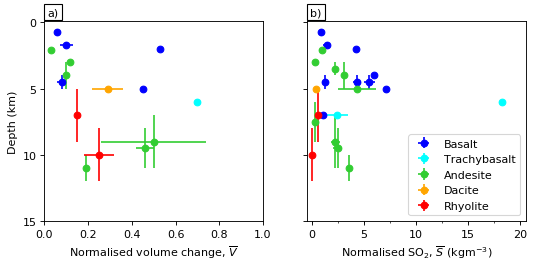

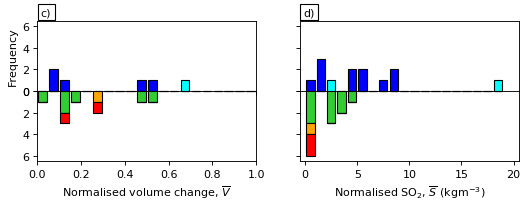

In [5]:
# plot first-order observations
fig = plt.figure(figsize=(12,10), dpi=80)
gs = plt.GridSpec(3,3)
gs.update(hspace=0.25,top=1)

# Normalised volume change
ax1 = plt.subplot(gs[0,0])
ax1.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             color='blue', fmt='o', mfc='blue',label='Basalt')
ax1.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             color='cyan', fmt='o', mfc='cyan',label='Trachybasalt')
ax1.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             color='limegreen', fmt='o', mfc='limegreen',label='Andesite')
ax1.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Dacite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Dacite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             color='orange', fmt='o', mfc='orange',label='Dacite')
ax1.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Rhyolite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Rhyolite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             color='red', fmt='o', mfc='red',label='Rhyolite')
ax1.set_xlabel('Normalised volume change, $\overline{V}$')
ax1.set_ylim(-0.09635569,15)
ax1.set_xlim(-0.0, 1.0)
ax1.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1.set_ylabel('Depth (km)')
textstr = 'a)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.015, 1.07, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
        
# Normalised SO2
ax1 = plt.subplot(gs[0,1])
ax1.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             color='blue', fmt='o', mfc='blue',label='Basalt')
ax1.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             color='cyan', fmt='o', mfc='cyan',label='Trachybasalt')
ax1.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             color='limegreen', fmt='o', mfc='limegreen',label='Andesite')
ax1.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Dacite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Dacite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             color='orange', fmt='o', mfc='orange',label='Dacite')
ax1.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             color='red', fmt='o', mfc='red',label='Rhyolite')
ax1.set_xlabel('Normalised $\mathrm{SO_2}$, ' + r'$\overline{S}$ (kgm$^{-3}$)')
ax1.set_xlim(-0.5, 20.5)
ax1.set_ylim(-0.09635569,15)
ax1.invert_yaxis()
ax1.yaxis.set_ticklabels([])
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1.legend()
textstr = 'b)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.015, 1.07, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

######################################################################################################################################################
# plot histogram - normalised SO2
fig = plt.figure(figsize=(12,10), dpi=80)
gs = plt.GridSpec(10,3)
gs.update(hspace=0,top=1)

ax1 = plt.subplot(gs[1,0])
kwargs = dict(alpha=1, edgecolor = 'k', bins=np.linspace(0,1,21), rwidth=0.8)
ax1.hist(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'][~np.isnan(df_obs['Normalised volume change'])], **kwargs ,  color= 'blue', label='Basalt / Picro-Basalt')
ax1.hist(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'][~np.isnan(df_obs['Normalised volume change'])], **kwargs ,  color= 'cyan', label='Trachybasalt / Tephrite Basanite')
ax1.set_xlim(-0.0,1.0)
ax1.set_ylim(0,6.5)
ax1.set_ylabel('Frequency')
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax1.xaxis.set_ticklabels([])
textstr = 'c)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.016, 1.2, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

ax1 = plt.subplot(gs[1,1])
kwargs = dict(alpha=1, edgecolor = 'k', bins=range(0,20), rwidth=0.8)
ax1.hist(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])], **kwargs ,  color= 'blue', label='Basalt')
ax1.hist(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])], **kwargs ,  color= 'cyan', label='Trachybasalt')
ax1.set_xlim(-0.5,20.5)
ax1.set_ylim(0,6.5)
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
textstr = 'd)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.016, 1.2, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

# plot histogram - normalised volume change
ax1 = plt.subplot(gs[2,0])
kwargs = dict(alpha=1, edgecolor = 'k', bins=np.linspace(0,1,21), rwidth=0.8)
ax1.hist([df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'][~np.isnan(df_obs['Normalised volume change'])],
         df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Dacite'][~np.isnan(df_obs['Normalised volume change'])],
         df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Rhyolite'][~np.isnan(df_obs['Normalised volume change'])]], 
         **kwargs ,  color= ['limegreen','orange','red'], stacked=True, label=['Andesite','Dacite','Rhyolite'])
ax1.set_xlim(-0.0,1.0)
ax1.set_ylim(0,6.5)
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax1.set_xlabel('Normalised volume change, ' + r'$\overline{V}$')
plt.gca().invert_yaxis()

ax1 = plt.subplot(gs[2,1])
kwargs = dict(alpha=1, edgecolor = 'k', bins=range(0,20), rwidth=0.8)
ax1.hist([df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])],
         df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Dacite'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])],
         df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Rhyolite'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])]], 
         **kwargs ,  color= ['limegreen','orange','red'], stacked=True, label=['Andesite','Dacite','Rhyolite'])
ax1.set_xlim(-0.5,20.5)
ax1.set_ylim(0,6.5)
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax1.set_xlabel('Normalised $\mathrm{SO_2}$, ' + r'$\overline{S}$ (kgm$^{-3}$)')
ax1.yaxis.set_ticklabels([])
plt.gca().invert_yaxis()


## 3. Sensitivity test <a class="anchor" id="Sensitivitytest"></a>

In [6]:
# Set constants
magma_comp = 'rhyolite'
shear_modulus = 2100000000
erupted_rock_density = 2300
unit_vol = 1e9
magma_temp = 1123.15 

In [7]:
# Set parameter space to explore
p_space = input(f"Select parameter space ('H2O', 'CO2', 'S', 'fO2'): \n")
for i in range(0, len(p_space)):
    if p_space == p_space:
        print('\nExploring effects of ' + p_space + ':\n')
        break
    elif i == len(p_space) - 1:
        sys.exit("Error: please select the correct parameter")

# Explore parameter space
if p_space == 'H2O' or p_space == 'CO2' or p_space == 'S' or p_space == 'fO2':
# Read in files from EVo and do calculations
    for i in range(1, 4):
        dcomp_data = home_dir + f"{p_space}_{i}.csv"
        dcomp_calc = home_dir + f"E_{p_space}_{i}_calc.txt"
        df = pd.read_csv(dcomp_data, sep='\t', skiprows=8)
        print(f"Simulating {p_space} {i}")

        # Calculate wt% of volatiles in gas
        H2Ogas = df['wH2O'] * df['Gas_wt']   #change fraction to wt%
        CO2gas = df['wCO2'] * df['Gas_wt'] 
        SO2gas = df['wSO2'] * df['Gas_wt'] 
        H2Sgas = df['wH2S'] * df['Gas_wt'] 

        # Calculate mol% of volatiles in gas
        mH2Ogas = df['mH2O']* df['Gas_wt'] 
        mCO2gas = df['mCO2']* df['Gas_wt'] 
        mSO2gas = df['mSO2']* df['Gas_wt'] 
        mS2gas = df['mS2']* df['Gas_wt'] 
        mH2Sgas = df['mH2S']* df['Gas_wt'] 

        # Calculate wt% of dissolved SO2 
        SO2_melt = df['Stot_melt'] * 64 / 32

        # Calculate wt% of Sulfur in gas
        Sgas1 = []
        k = -1
        for i in range(0, len(df['rho_bulk'])):
            k = k + 1
            Sgas2 = (SO2gas[i] / 64 * 32) + (H2Sgas[i] / 34 * 32)
            Sgas1.append(Sgas2)
        Sgas = np.array(Sgas1)

        #Total moles in 1 m3 magma
        tot_mol_1m3magma = erupted_rock_density * (df['Gas_wt']/100) / df['mol_mass']

        #Volume of fluid in 1 m3 magma
        vol_fluid_1m3magma = tot_mol_1m3magma * 8.31 * magma_temp / (df['P'] * 100000)

        #Mass of SO2 released in 1 m3 magma (kg)
        mS_released = df['mSO2'] * tot_mol_1m3magma * 0.064
        mSulfur_released = (df['mSO2'] * tot_mol_1m3magma * 0.032) + (df['mS2'] * tot_mol_1m3magma * 0.032) + (df['mH2S'] * tot_mol_1m3magma * 0.032)

        #Depth (km)
        depth = df['P'] * 100 / (erupted_rock_density * 9.8)

        #alpha (fluid vol%)
        alpha = vol_fluid_1m3magma * 100

        # Magma compressibility
        dd_dp1 = []  #Change of density with pressure
        k = 0
        for i in range(0, len(df['rho_bulk'])):
            if i == len(df['rho_bulk']) - 1:
                break
            k = k + 1
            dd_dp2 = ((df['rho_bulk'][k - 1] - df['rho_bulk'][k]) /
                      ((df['P'][k - 1] * 100000) - (df['P'][k] * 100000)))
            dd_dp1.append(dd_dp2)
        dd_dp1.insert(0, np.nan)
        dd_dp_bulk = np.array(dd_dp1)

        beta1 = []  #Compressibility = 1/magma density * dd_dp
        for i in range(0, len(df['rho_bulk']) - 1):
            beta2 = ((dd_dp_bulk[i] / df['rho_bulk'][i + 1]))
            beta1.append(beta2)
        beta1[0] = np.nan
        beta1.append(np.nan)
        beta_bulk = np.array(beta1)

        rv1 = []
        for i in range(0, len(beta_bulk)):
            rv2 = ((1 + ((4 * shear_modulus * beta_bulk[i]) / 3)))
            rv1.append(rv2)
        rv1[0] = np.nan
        rv1[-1] = np.nan
        rv_bulk = np.array(rv1)

        # Melt compressibility
        dd_dp1 = []  #Change of density with pressure
        k = 0
        for i in range(0, len(df['rho_melt'])):
            if i == len(df['rho_melt']) - 1:
                break
            k = k + 1
            dd_dp2 = ((df['rho_melt'][k - 1] - df['rho_melt'][k]) /
                      ((df['P'][k - 1] * 100000) - (df['P'][k] * 100000)))
            dd_dp1.append(dd_dp2)
        dd_dp1.insert(0, np.nan)
        dd_dp_melt = np.array(dd_dp1)

        beta1 = []  #Compressibility = 1/magma density * dd_dp
        for i in range(0, len(df['rho_melt']) - 1):
            beta2 = ((dd_dp_melt[i] / df['rho_melt'][i + 1]))
            beta1.append(beta2)
        beta1[0] = np.nan
        beta1.append(np.nan)
        beta_melt = np.array(beta1)

        rv1 = []
        for i in range(0, len(beta_melt)):
            rv2 = ((1 + ((4 * shear_modulus * beta_melt[i]) / 3)))  #/1.75)
            rv1.append(rv2)
        rv1[0] = np.nan
        rv1[-1] = np.nan
        rv_melt = np.array(rv1)

        #Sulfur partition coefficient
        Spart = ((mS_released / unit_vol) /
                 ((1 - (df['Gas_wt']/100)) * erupted_rock_density * df['Stot_melt'] / 100))

        # Vertical displacement
        z_bulk = ((1-0.25)/np.pi)*((1/rv_bulk)/((depth*1000)**2)) *1e9
        z_melt = ((1-0.25)/np.pi)*((1/rv_melt)/((depth*1000)**2)) *1e9

        f = open(dcomp_calc, "w")
        np.savetxt(
            dcomp_calc,
            np.transpose([
                df['P'], depth, df['H2O_melt'], df['CO2_melt'], df['S2-_melt'], df['S6+_melt'],df['Stot_melt'],SO2_melt,
                H2Ogas, CO2gas, SO2gas, Sgas, mH2Ogas, mCO2gas, mSO2gas, mS2gas, mH2Sgas,
                mS_released,mSulfur_released, Spart, df['Exsol_vol%'],
                df['Gas_wt'], df['rho_bulk'], df['rho_melt'], 
                dd_dp_bulk, beta_bulk, rv_bulk, z_bulk, 
                dd_dp_melt, beta_melt, rv_melt, z_melt
            ]),
            fmt='%1.5e',
            delimiter='\t',
            comments='',
            header=
            'Pbar\tdepth\tH2O_melt\tCO2_melt\tS6+_melt\tS2-_melt\tStot_melt\tSO2_melt\tH2Ogas\tCO2gas\tSO2gas\tSgas\tmH2Ogas\tmCO2gas\tmSO2gas\tmS2gas\tmH2Sgas\tmS_released\tmSulfur_released\tSpart\tExsolv_vol_wt\tGas_wt\tRhoBulk\trhomelt\tdd_dp_bulk\tbeta_bulk\trv_bulk\tz_bulk\tdd_dp_melt\tbeta_melt\trv_melt\tz_melt'
        )

    # Read in files
    dcomp_calc_1 = home_dir + f"E_{p_space}_1_calc.txt"
    dcomp_calc_2 = home_dir + f"E_{p_space}_2_calc.txt"
    dcomp_calc_3 = home_dir + f"E_{p_space}_3_calc.txt"
    df_calc = ([0, pd.read_csv(dcomp_calc_1, sep='\t'), pd.read_csv(dcomp_calc_2, sep='\t'), pd.read_csv(dcomp_calc_3, sep='\t')])
    
    print('\nDone!')
    
# Set range of parameters for labelling figures
if p_space == 'H2O':
    sensitivity1 ='5.0 wt% H$_2$O'
    sensitivity2 ='10.0 wt% H$_2$O'
    sensitivity3 ='15.0 wt% H$_2$O'
elif p_space == 'CO2':
    sensitivity1 ='1.0 wt% CO$_2$'
    sensitivity2 ='2.0 wt% CO$_2$'
    sensitivity3 ='3.0 wt% CO$_2$'
elif p_space == 'fO2':
    sensitivity1 ='NNO-1'
    sensitivity2 ='NNO'
    sensitivity3 ='NNO+1'
elif p_space == 'S':
    sensitivity1 ='1800 p.p.m. S'
    sensitivity2 ='3000 p.p.m. S'
    sensitivity3 ='4200 p.p.m. S'

Select parameter space ('H2O', 'CO2', 'S', 'fO2'): 
H2O

Exploring effects of H2O:

Simulating H2O 1
Simulating H2O 2
Simulating H2O 3

Done!


In [8]:
# Set percolation threshold
perc_thres = int(input('Set percolation threshold (Basalt = 37 vol%; Rhyolite = 17 vol%):\n'))
min_percolation1=np.where(df_calc[1]['Exsolv_vol_wt'] == find_nearest(df_calc[1]['Exsolv_vol_wt'], perc_thres)) #find position of depth closest to res_depth
min_percolation1=float(min_percolation1[0])
min_percolation2=np.where(df_calc[2]['Exsolv_vol_wt'] == find_nearest(df_calc[2]['Exsolv_vol_wt'], perc_thres)) #find position of depth closest to res_depth
min_percolation2=float(min_percolation2[0])
min_percolation3=np.where(df_calc[3]['Exsolv_vol_wt'] == find_nearest(df_calc[3]['Exsolv_vol_wt'], perc_thres)) #find position of depth closest to res_depth
min_percolation3=float(min_percolation3[0])

# Set reservoir depth
res_depth = float(input('\nSet reservoir depth (km):\n'))

Set percolation threshold (Basalt = 37 vol%; Rhyolite = 17 vol%):
17

Set reservoir depth (km):
5


### Fig. 3
- derived from each sensitivity test - panels c, g and h

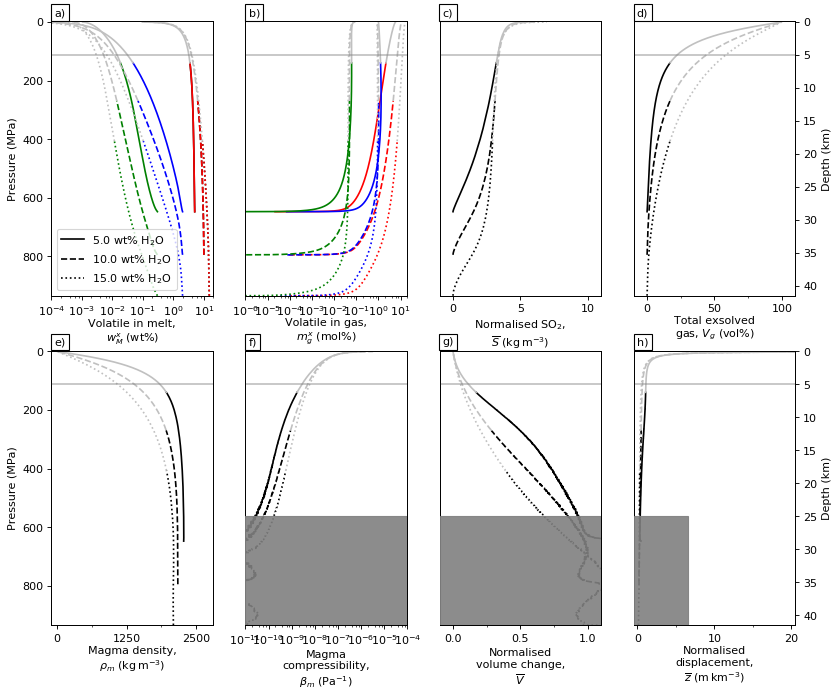

In [9]:
# Plot figure
# Remove nan
rv1 = df_calc[1]['beta_bulk']
rv2 = df_calc[2]['beta_bulk'] 
rv3 = df_calc[3]['beta_bulk'] 

#Plot figure
plot8_sensitivity_rhyolite(
    df_calc[1]['Pbar'][~np.isnan(rv1)],df_calc[2]['Pbar'][~np.isnan(rv2)],df_calc[3]['Pbar'][~np.isnan(rv3)],
    df_calc[1]['depth'][~np.isnan(rv1)],df_calc[2]['depth'][~np.isnan(rv2)],df_calc[3]['depth'][~np.isnan(rv3)],
    min_percolation1,min_percolation2,min_percolation3,res_depth,
    df_calc[1]['H2O_melt'][~np.isnan(rv1)],df_calc[1]['CO2_melt'][~np.isnan(rv1)],df_calc[1]['Stot_melt'][~np.isnan(rv1)],
    df_calc[1]['mH2Ogas'][~np.isnan(rv1)],df_calc[1]['mCO2gas'][~np.isnan(rv1)],df_calc[1]['mSO2gas'][~np.isnan(rv1)],
    df_calc[1]['mS_released'][~np.isnan(rv1)],df_calc[1]['Exsolv_vol_wt'][~np.isnan(rv1)],df_calc[1]['RhoBulk'][~np.isnan(rv1)],
    df_calc[1]['beta_bulk'][~np.isnan(rv1)],df_calc[1]['rv_bulk'][~np.isnan(rv1)],df_calc[1]['z_bulk'][~np.isnan(rv1)],
    df_calc[2]['H2O_melt'][~np.isnan(rv2)],df_calc[2]['CO2_melt'][~np.isnan(rv2)],df_calc[2]['Stot_melt'][~np.isnan(rv2)],
    df_calc[2]['mH2Ogas'][~np.isnan(rv2)],df_calc[2]['mCO2gas'][~np.isnan(rv2)],df_calc[2]['mSO2gas'][~np.isnan(rv2)],
    df_calc[2]['mS_released'][~np.isnan(rv2)],df_calc[2]['Exsolv_vol_wt'][~np.isnan(rv2)],df_calc[2]['RhoBulk'][~np.isnan(rv2)],
    df_calc[2]['beta_bulk'][~np.isnan(rv2)],df_calc[2]['rv_bulk'][~np.isnan(rv2)],df_calc[2]['z_bulk'][~np.isnan(rv2)],
    df_calc[3]['H2O_melt'][~np.isnan(rv3)],df_calc[3]['CO2_melt'][~np.isnan(rv3)],df_calc[3]['Stot_melt'][~np.isnan(rv3)],
    df_calc[3]['mH2Ogas'][~np.isnan(rv3)],df_calc[3]['mCO2gas'][~np.isnan(rv3)],df_calc[3]['mSO2gas'][~np.isnan(rv3)],
    df_calc[3]['mS_released'][~np.isnan(rv3)],df_calc[3]['Exsolv_vol_wt'][~np.isnan(rv3)],df_calc[3]['RhoBulk'][~np.isnan(rv3)],
    df_calc[3]['beta_bulk'][~np.isnan(rv3)],df_calc[3]['rv_bulk'][~np.isnan(rv3)],df_calc[3]['z_bulk'][~np.isnan(rv3)])



## 4. Basalt vs. Rhyolite <a class="anchor" id="basalt_vs_rhyolite"></a>

### Fig. 4

In [10]:
# Simulating magma properties of basalt and rhyolite
p_space = 'b_vs_r'
for i in range(0, len(p_space)):
    if p_space == p_space:
        print('\nComparison between basalt and rhyolite:\n')
        break
    elif i == len(p_space) - 1:
        sys.exit("Error: please select the correct parameter")

# Explore parameter space
for j in range(0,4):
    k = (['O_1H2O','O_3H2O','R_5H2O','R_15H2O'])
    dcomp_data = home_dir + f"{p_space}_{k[j]}.csv"
    dcomp_calc = home_dir + f"E_{p_space}_{k[j]}_calc.txt"
    df = pd.read_csv(dcomp_data, sep='\t', skiprows=8)
    print(f"Simulating {k[j][0]}: {k[j][2:]}")

    # Calculate wt% of volatiles in gas
    H2Ogas = df['wH2O'] * df['Gas_wt']   #change fraction to wt%
    CO2gas = df['wCO2'] * df['Gas_wt'] 
    SO2gas = df['wSO2'] * df['Gas_wt'] 
    H2Sgas = df['wH2S'] * df['Gas_wt'] 

    # Calculate mol% of volatiles in gas
    mH2Ogas = df['mH2O']* df['Gas_wt'] 
    mCO2gas = df['mCO2']* df['Gas_wt'] 
    mSO2gas = df['mSO2']* df['Gas_wt'] 
    mS2gas = df['mS2']* df['Gas_wt'] 
    mH2Sgas = df['mH2S']* df['Gas_wt'] 

    # Calculate wt% of dissolved SO2 
    SO2_melt = df['Stot_melt'] * 64 / 32

    # Calculate wt% of Sulfur in gas
    Sgas1 = []
    k = -1
    for i in range(0, len(df['rho_bulk'])):
        k = k + 1
        Sgas2 = (SO2gas[i] / 64 * 32) + (H2Sgas[i] / 34 * 32)
        Sgas1.append(Sgas2)
    Sgas = np.array(Sgas1)

    #Total moles in 1 m3 magma
    if j < 2: 
        erupted_rock_density = 2800 #basalt density 
    else: erupted_rock_density = 2300 #rhyolite density
    tot_mol_1m3magma = erupted_rock_density * (df['Gas_wt']/100) / df['mol_mass']

    #Volume of fluid in 1 m3 magma
    vol_fluid_1m3magma = tot_mol_1m3magma * 8.31 * magma_temp / (df['P'] * 100000)

    #Mass of SO2 released in 1 m3 magma (kg)
    mS_released = df['mSO2'] * tot_mol_1m3magma * 0.064
    mSulfur_released = (df['mSO2'] * tot_mol_1m3magma * 0.032) + (df['mS2'] * tot_mol_1m3magma * 0.032) + (df['mH2S'] * tot_mol_1m3magma * 0.032)

    #Depth (km)
    depth = df['P'] * 100 / (erupted_rock_density * 9.8)

    #alpha (fluid vol%)
    alpha = vol_fluid_1m3magma * 100

    # Magma compressibility
    dd_dp1 = []  #Change of density with pressure
    k = 0
    for i in range(0, len(df['rho_bulk'])):
        if i == len(df['rho_bulk']) - 1:
            break
        k = k + 1
        dd_dp2 = ((df['rho_bulk'][k - 1] - df['rho_bulk'][k]) /
                  ((df['P'][k - 1] * 100000) - (df['P'][k] * 100000)))
        dd_dp1.append(dd_dp2)
    dd_dp1.insert(0, np.nan)
    dd_dp_bulk = np.array(dd_dp1)

    beta1 = []  #Compressibility = 1/magma density * dd_dp
    for i in range(0, len(df['rho_bulk']) - 1):
        beta2 = ((dd_dp_bulk[i] / df['rho_bulk'][i + 1]))
        beta1.append(beta2)
    beta1[0] = np.nan
    beta1.append(np.nan)
    beta_bulk = np.array(beta1)

    rv1 = []
    for i in range(0, len(beta_bulk)):
        rv2 = ((1 + ((4 * shear_modulus * beta_bulk[i]) / 3)))
        rv1.append(rv2)
    rv1[0] = np.nan
    rv1[-1] = np.nan
    rv_bulk = np.array(rv1)

    # Melt compressibility
    dd_dp1 = []  #Change of density with pressure
    k = 0
    for i in range(0, len(df['rho_melt'])):
        if i == len(df['rho_melt']) - 1:
            break
        k = k + 1
        dd_dp2 = ((df['rho_melt'][k - 1] - df['rho_melt'][k]) /
                  ((df['P'][k - 1] * 100000) - (df['P'][k] * 100000)))
        dd_dp1.append(dd_dp2)
    dd_dp1.insert(0, np.nan)
    dd_dp_melt = np.array(dd_dp1)

    beta1 = []  #Compressibility = 1/magma density * dd_dp
    for i in range(0, len(df['rho_melt']) - 1):
        beta2 = ((dd_dp_melt[i] / df['rho_melt'][i + 1]))
        beta1.append(beta2)
    beta1[0] = np.nan
    beta1.append(np.nan)
    beta_melt = np.array(beta1)

    rv1 = []
    for i in range(0, len(beta_melt)):
        rv2 = ((1 + ((4 * shear_modulus * beta_melt[i]) / 3)))  #/1.75)
        rv1.append(rv2)
    rv1[0] = np.nan
    rv1[-1] = np.nan
    rv_melt = np.array(rv1)

    #Sulfur partition coefficient
    Spart = ((mS_released / unit_vol) /
             ((1 - (df['Gas_wt']/100)) * erupted_rock_density * df['Stot_melt'] / 100))

    # Vertical displacement
    z_bulk = ((1-0.25)/np.pi)*((1/rv_bulk)/((depth*1000)**2)) *1e9
    z_melt = ((1-0.25)/np.pi)*((1/rv_melt)/((depth*1000)**2)) *1e9

    f = open(dcomp_calc, "w")
    np.savetxt(
        dcomp_calc,
        np.transpose([
            df['P'], depth, df['H2O_melt'], df['CO2_melt'], df['S2-_melt'], df['S6+_melt'],df['Stot_melt'],SO2_melt,
            H2Ogas, CO2gas, SO2gas, Sgas, mH2Ogas, mCO2gas, mSO2gas, mS2gas, mH2Sgas,
            mS_released,mSulfur_released, Spart, df['Exsol_vol%'],
            df['Gas_wt'], df['rho_bulk'], df['rho_melt'], 
            dd_dp_bulk, beta_bulk, rv_bulk, z_bulk, 
            dd_dp_melt, beta_melt, rv_melt, z_melt
        ]),
        fmt='%1.5e',
        delimiter='\t',
        comments='',
        header=
        'Pbar\tdepth\tH2O_melt\tCO2_melt\tS6+_melt\tS2-_melt\tStot_melt\tSO2_melt\tH2Ogas\tCO2gas\tSO2gas\tSgas\tmH2Ogas\tmCO2gas\tmSO2gas\tmS2gas\tmH2Sgas\tmS_released\tmSulfur_released\tSpart\tExsolv_vol_wt\tGas_wt\tRhoBulk\trhomelt\tdd_dp_bulk\tbeta_bulk\trv_bulk\tz_bulk\tdd_dp_melt\tbeta_melt\trv_melt\tz_melt'
    )

# # Read in files
# dcomp_calc_1 = home_dir + f"E_{p_space}_1_calc.txt"
# dcomp_calc_2 = home_dir + f"E_{p_space}_2_calc.txt"
# dcomp_calc_3 = home_dir + f"E_{p_space}_3_calc.txt"
# df_calc = ([0, pd.read_csv(dcomp_calc_1, sep='\t'), pd.read_csv(dcomp_calc_2, sep='\t'), pd.read_csv(dcomp_calc_3, sep='\t')])

# print('\nDone!')
    
# Read in files
df_calc = []
k = (['O_1H2O','O_3H2O','R_5H2O','R_15H2O'])
for j in range(0,4):
    add_df_calc = home_dir + f"E_{p_space}_{k[j]}_calc.txt"
    df_calc = df_calc + [pd.read_csv(add_df_calc, sep='\t')]

print('\nDone!')   

# Set range of parameters for labelling figures
if p_space == 'b_vs_r':
    sensitivity0 ='Basalt: H2O = 1 wt%'
    sensitivity1 ='Basalt: H2O = 3.3 wt%'
    sensitivity2 ='Rhyolite: H2O = 5 wt%'
    sensitivity3 ='Rhyolite: H2O = 1 wt%'



Comparison between basalt and rhyolite:

Simulating O: 1H2O
Simulating O: 3H2O
Simulating R: 5H2O
Simulating R: 15H2O

Done!


In [11]:
# Set percolation threshold
print('Percolation threshold: Basalt = 37 vol%; Rhyolite = 17 vol%')
min_percolation0=np.where(df_calc[0]['Exsolv_vol_wt'] == find_nearest(df_calc[0]['Exsolv_vol_wt'], 37)) #find position of depth closest to res_depth
min_percolation0=float(min_percolation0[0])
min_percolation1=np.where(df_calc[1]['Exsolv_vol_wt'] == find_nearest(df_calc[1]['Exsolv_vol_wt'], 37)) #find position of depth closest to res_depth
min_percolation1=float(min_percolation1[0])
min_percolation2=np.where(df_calc[2]['Exsolv_vol_wt'] == find_nearest(df_calc[2]['Exsolv_vol_wt'], 17)) #find position of depth closest to res_depth
min_percolation2=float(min_percolation2[0])
min_percolation3=np.where(df_calc[3]['Exsolv_vol_wt'] == find_nearest(df_calc[3]['Exsolv_vol_wt'], 17)) #find position of depth closest to res_depth
min_percolation3=float(min_percolation3[0])

# Set reservoir depth
res_depth = float(input('\nSet reservoir depth (km):\n'))

Percolation threshold: Basalt = 37 vol%; Rhyolite = 17 vol%

Set reservoir depth (km):
5


Text(0.02, 1.05, 'h)')

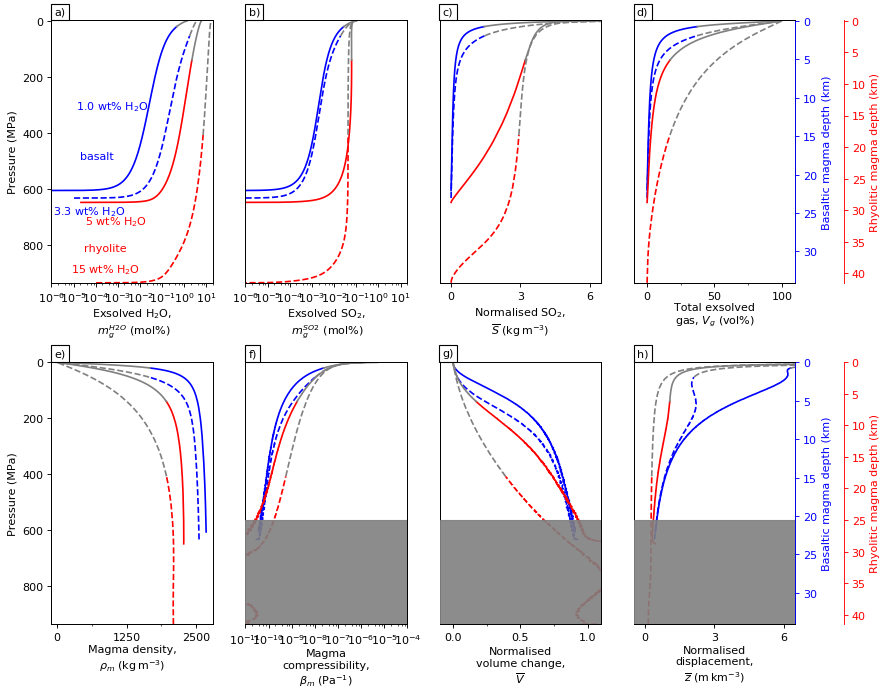

In [12]:
# Plot figure
rv0 = df_calc[0]['beta_bulk'] 
rv1 = df_calc[1]['beta_bulk']
rv2 = df_calc[2]['beta_bulk'] 
rv3 = df_calc[3]['beta_bulk'] 

fig = plt.figure(figsize=(12, 10), dpi=80)
fig.subplots_adjust(hspace=0.3)

# Exsolved H2O
ax1 = fig.add_subplot(2, 4, 1)
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['mH2Ogas'][~np.isnan(rv0)][0:int(min_percolation0)], df_calc[0]['Pbar'][~np.isnan(rv0)][0:int(min_percolation0)]/10, c='b', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['mH2Ogas'][~np.isnan(rv1)][0:int(min_percolation1)], df_calc[1]['Pbar'][~np.isnan(rv1)][0:int(min_percolation1)]/10, c='b', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['mH2Ogas'][~np.isnan(rv2)][0:int(min_percolation2)], df_calc[2]['Pbar'][~np.isnan(rv2)][0:int(min_percolation2)]/10, c='r', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['mH2Ogas'][~np.isnan(rv3)][0:int(min_percolation3)], df_calc[3]['Pbar'][~np.isnan(rv3)][0:int(min_percolation3)]/10, c='r', label=sensitivity3, linestyle = 'dashed')
ax1.plot(df_calc[0]['mH2Ogas'][~np.isnan(rv0)][int(min_percolation0):-1], df_calc[0]['Pbar'][~np.isnan(rv0)][int(min_percolation0):-1]/10, c='grey', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['mH2Ogas'][~np.isnan(rv1)][int(min_percolation1):-1], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1]/10, c='grey', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['mH2Ogas'][~np.isnan(rv2)][int(min_percolation2):-1], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1]/10, c='grey', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['mH2Ogas'][~np.isnan(rv3)][int(min_percolation3):-1], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1]/10, c='grey', label=sensitivity3, linestyle = 'dashed')
ax1.set_xlabel('Exsolved H$_2$O,\n $m^{H2O}_{g}$ (mol%)')
ax1.set_ylabel('Pressure (MPa)')
ax1.set_xlim(0.000001, 20)
ax1.set_xscale('log')
ax1.set_ylim((df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[-1]-27.45)/10, df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[3]['depth'][~np.isnan(rv3)].iloc[-1]-0.1,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0])
ax2.invert_yaxis()
locmaj = mpl.ticker.LogLocator(base=10, numticks=10)
ax1.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=10)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.set_yticks([])
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
textstr = 'a)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
ax1.text(0.18, 0.5, 'basalt', color='blue', transform=ax1.transAxes, fontsize=10,verticalalignment='top')
ax1.text(0.15, 0.7, '1.0 wt% H$_2$O', color='blue', transform=ax1.transAxes, fontsize=10,verticalalignment='top')
ax1.text(0.01, 0.3, '3.3 wt% H$_2$O', color='blue', transform=ax1.transAxes, fontsize=10,verticalalignment='top')
ax1.text(0.20, 0.15, 'rhyolite', color='red', transform=ax1.transAxes, fontsize=10,verticalalignment='top')
ax1.text(0.21, 0.26, '5 wt% H$_2$O', color='red', transform=ax1.transAxes, fontsize=10,verticalalignment='top')
ax1.text(0.12, 0.08, '15 wt% H$_2$O', color='red', transform=ax1.transAxes, fontsize=10,verticalalignment='top')

# Exsolved SO2
ax1 = fig.add_subplot(2, 4, 2)
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['mSO2gas'][~np.isnan(rv0)][0:int(min_percolation0)], df_calc[0]['Pbar'][~np.isnan(rv0)][0:int(min_percolation0)]/10, c='b', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['mSO2gas'][~np.isnan(rv1)][0:int(min_percolation1)], df_calc[1]['Pbar'][~np.isnan(rv1)][0:int(min_percolation1)]/10, c='b', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['mSO2gas'][~np.isnan(rv2)][0:int(min_percolation2)], df_calc[2]['Pbar'][~np.isnan(rv2)][0:int(min_percolation2)]/10, c='r', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['mSO2gas'][~np.isnan(rv3)][0:int(min_percolation3)], df_calc[3]['Pbar'][~np.isnan(rv3)][0:int(min_percolation3)]/10, c='r', label=sensitivity3, linestyle = 'dashed')
ax1.plot(df_calc[0]['mSO2gas'][~np.isnan(rv0)][int(min_percolation0):-1], df_calc[0]['Pbar'][~np.isnan(rv0)][int(min_percolation0):-1]/10, c='grey', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['mSO2gas'][~np.isnan(rv1)][int(min_percolation1):-1], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1]/10, c='grey', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['mSO2gas'][~np.isnan(rv2)][int(min_percolation2):-1], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1]/10, c='grey', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['mSO2gas'][~np.isnan(rv3)][int(min_percolation3):-1], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1]/10, c='grey', label=sensitivity3, linestyle = 'dashed')
# ax1.legend(loc='lower left')
ax1.set_xlabel('Exsolved SO$_2$,\n $m^{SO2}_{g}$ (mol%)')
ax1.set_xlim(0.000001, 20)
ax1.set_xscale('log')
ax1.set_ylim((df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[-1]-27.45)/10, df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[3]['depth'][~np.isnan(rv3)].iloc[-1]-0.1,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0])
ax2.invert_yaxis()
locmaj = mpl.ticker.LogLocator(base=10, numticks=10)
ax1.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=10)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.set_yticks([])
ax2.set_yticks([])
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
textstr = 'b)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

# Normalised SO2
ax1 = fig.add_subplot(2, 4, 3)
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['mS_released'][~np.isnan(rv0)][0:int(min_percolation0)], df_calc[0]['Pbar'][~np.isnan(rv0)][0:int(min_percolation0)]/10, c='b', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['mS_released'][~np.isnan(rv1)][0:int(min_percolation1)], df_calc[1]['Pbar'][~np.isnan(rv1)][0:int(min_percolation1)]/10, c='b', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['mS_released'][~np.isnan(rv2)][0:int(min_percolation2)], df_calc[2]['Pbar'][~np.isnan(rv2)][0:int(min_percolation2)]/10, c='r', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['mS_released'][~np.isnan(rv3)][0:int(min_percolation3)], df_calc[3]['Pbar'][~np.isnan(rv3)][0:int(min_percolation3)]/10, c='r', label=sensitivity3, linestyle = 'dashed')
ax1.plot(df_calc[0]['mS_released'][~np.isnan(rv0)][int(min_percolation0):-1], df_calc[0]['Pbar'][~np.isnan(rv0)][int(min_percolation0):-1]/10, c='grey', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['mS_released'][~np.isnan(rv1)][int(min_percolation1):-1], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1]/10, c='grey', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['mS_released'][~np.isnan(rv2)][int(min_percolation2):-1], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1]/10, c='grey', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['mS_released'][~np.isnan(rv3)][int(min_percolation3):-1], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1]/10, c='grey', label=sensitivity3, linestyle = 'dashed')
# ax1.legend(loc='lower left')
ax1.set_xlabel('Normalised $\mathrm{SO_2}$,\n' + r'$\overline{S}$ (kg$\,$m$^{-3}$)')
ax1.set_ylim((df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[-1]-27.45)/10, df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[3]['depth'][~np.isnan(rv3)].iloc[-1]-0.1,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0])
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
ax1.set_yticks([])
ax2.set_yticks([])
ax1.set_xlim(-0.5, 6.5)
textstr = 'c)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
    
# Total exsolved volatiles
ax1 = fig.add_subplot(2, 4, 4)
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['Exsolv_vol_wt'][~np.isnan(rv0)][0:int(min_percolation0)], df_calc[0]['Pbar'][~np.isnan(rv0)][0:int(min_percolation0)]/10, c='b', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['Exsolv_vol_wt'][~np.isnan(rv1)][0:int(min_percolation1)], df_calc[1]['Pbar'][~np.isnan(rv1)][0:int(min_percolation1)]/10, c='b', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['Exsolv_vol_wt'][~np.isnan(rv2)][0:int(min_percolation2)], df_calc[2]['Pbar'][~np.isnan(rv2)][0:int(min_percolation2)]/10, c='r', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['Exsolv_vol_wt'][~np.isnan(rv3)][0:int(min_percolation3)], df_calc[3]['Pbar'][~np.isnan(rv3)][0:int(min_percolation3)]/10, c='r', label=sensitivity3, linestyle = 'dashed')
ax1.plot(df_calc[0]['Exsolv_vol_wt'][~np.isnan(rv0)][int(min_percolation0):-1], df_calc[0]['Pbar'][~np.isnan(rv0)][int(min_percolation0):-1]/10, c='grey', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['Exsolv_vol_wt'][~np.isnan(rv1)][int(min_percolation1):-1], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1]/10, c='grey', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['Exsolv_vol_wt'][~np.isnan(rv2)][int(min_percolation2):-1], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1]/10, c='grey', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['Exsolv_vol_wt'][~np.isnan(rv3)][int(min_percolation3):-1], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1]/10, c='grey', label=sensitivity3, linestyle = 'dashed')
ax1.set_xlabel('Total exsolved\ngas, $V_{g}$ (vol%)')
ax1.set_ylim((df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[-1]-27.45)/10, df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[1]['depth'][~np.isnan(rv1)].iloc[-1]-0.1,34.08)
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax2.set_ylabel('Basaltic magma depth (km)')
ax2.spines['right'].set_color('blue')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
ax1.set_xlim(-10, 110)
ax1.set_yticks([])
textstr = 'd)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
# set up the 3rd axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("axes", 1.3))
ax3.set_ylim(df_calc[3]['depth'][~np.isnan(rv3)].iloc[-1]-0.1,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0])
ax3.invert_yaxis()
ax3.set_ylabel('Rhyolitic magma depth (km)')
ax3.spines['right'].set_color('red')
ax3.yaxis.label.set_color('red')
ax3.tick_params(axis='y', colors='red')

# Density
ax1 = fig.add_subplot(2, 4, 5)
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['RhoBulk'][~np.isnan(rv0)][0:int(min_percolation0)], df_calc[0]['Pbar'][~np.isnan(rv0)][0:int(min_percolation0)]/10, c='b', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['RhoBulk'][~np.isnan(rv1)][0:int(min_percolation1)], df_calc[1]['Pbar'][~np.isnan(rv1)][0:int(min_percolation1)]/10, c='b', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['RhoBulk'][~np.isnan(rv2)][0:int(min_percolation2)], df_calc[2]['Pbar'][~np.isnan(rv2)][0:int(min_percolation2)]/10, c='r', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['RhoBulk'][~np.isnan(rv3)][0:int(min_percolation3)], df_calc[3]['Pbar'][~np.isnan(rv3)][0:int(min_percolation3)]/10, c='r', label=sensitivity3, linestyle = 'dashed')
ax1.plot(df_calc[0]['RhoBulk'][~np.isnan(rv0)][int(min_percolation0):-1], df_calc[0]['Pbar'][~np.isnan(rv0)][int(min_percolation0):-1]/10, c='grey', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['RhoBulk'][~np.isnan(rv1)][int(min_percolation1):-1], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1]/10, c='grey', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['RhoBulk'][~np.isnan(rv2)][int(min_percolation2):-1], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1]/10, c='grey', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['RhoBulk'][~np.isnan(rv3)][int(min_percolation3):-1], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1]/10, c='grey', label=sensitivity3, linestyle = 'dashed')
ax1.set_xlabel('Magma density,\n' + r'$\rho_{m}$ (kg$\,$m$^{-3}$)')
ax1.set_ylabel('Pressure (MPa)')
ax1.set_ylim((df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[-1]-27.45)/10, df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[3]['depth'][~np.isnan(rv3)].iloc[-1]-0.1,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0])
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1250))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(625))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
ax1.set_xlim(-100, 2800)
ax2.set_yticks([])
textstr = 'e)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
  
# Compressibility
ax1 = fig.add_subplot(2, 4, 6)
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['beta_bulk'][~np.isnan(rv0)][1:int(min_percolation0):10], df_calc[0]['Pbar'][~np.isnan(rv0)][1:int(min_percolation0):10]/10, c='b', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['beta_bulk'][~np.isnan(rv1)][1:int(min_percolation1):10], df_calc[1]['Pbar'][~np.isnan(rv1)][1:int(min_percolation1):10]/10, c='b', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['beta_bulk'][~np.isnan(rv2)][1:int(min_percolation2):10], df_calc[2]['Pbar'][~np.isnan(rv2)][1:int(min_percolation2):10]/10, c='r', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['beta_bulk'][~np.isnan(rv3)][1:int(min_percolation3):10], df_calc[3]['Pbar'][~np.isnan(rv3)][1:int(min_percolation3):10]/10, c='r', label=sensitivity3, linestyle = 'dashed')
ax1.plot(df_calc[0]['beta_bulk'][~np.isnan(rv0)][int(min_percolation0):-1:10], df_calc[0]['Pbar'][~np.isnan(rv0)][int(min_percolation0):-1:10]/10, c='grey', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['beta_bulk'][~np.isnan(rv1)][int(min_percolation1):-1:10], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1:10]/10, c='grey', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['beta_bulk'][~np.isnan(rv2)][int(min_percolation2):-1:10], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1:10]/10, c='grey', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['beta_bulk'][~np.isnan(rv3)][int(min_percolation3):-1:10], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1:10]/10, c='grey', label=sensitivity3, linestyle = 'dashed')
ax1.set_xlabel('Magma\ncompressibility,\n' + r'$\beta_{m}$ (Pa$^{-1}$)')
ax1.set_xscale('log')
ax1.set_xlim(0.00000000001, 0.0001)
ax1.set_ylim((df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[-1]-27.45)/10, df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[3]['depth'][~np.isnan(rv3)].iloc[-1]-0.1,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0])
ax2.invert_yaxis()
locmaj = mpl.ticker.LogLocator(base=10, numticks=10)
ax1.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=10)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
ax1.set_yticks([])
ax2.set_yticks([])
rect = mpl.patches.Rectangle((0.00000000001,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0]), 0.0001+0.00000000001, 25-df_calc[3]['depth'][~np.isnan(rv3)].iloc[0], linewidth=1, edgecolor='gray', facecolor='gray', zorder=3, alpha = 0.9)
ax2.add_patch(rect)
textstr = 'f)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

# Normalised volume change
ax1 = fig.add_subplot(2, 4, 7)
ax2 = ax1.twinx()
ax1.plot(1/df_calc[0]['rv_bulk'][~np.isnan(rv0)][1:int(min_percolation0):10], df_calc[0]['Pbar'][~np.isnan(rv0)][1:int(min_percolation0):10]/10, c='b', label=sensitivity0, linestyle = '-')
ax1.plot(1/df_calc[1]['rv_bulk'][~np.isnan(rv1)][1:int(min_percolation1):10], df_calc[1]['Pbar'][~np.isnan(rv1)][1:int(min_percolation1):10]/10, c='b', label=sensitivity1, linestyle = 'dashed')
ax1.plot(1/df_calc[2]['rv_bulk'][~np.isnan(rv2)][1:int(min_percolation2):10], df_calc[2]['Pbar'][~np.isnan(rv2)][1:int(min_percolation2):10]/10, c='r', label=sensitivity2, linestyle = '-')
ax1.plot(1/df_calc[3]['rv_bulk'][~np.isnan(rv3)][1:int(min_percolation3):10], df_calc[3]['Pbar'][~np.isnan(rv3)][1:int(min_percolation3):10]/10, c='r', label=sensitivity3, linestyle = 'dashed')
ax1.plot(1/df_calc[0]['rv_bulk'][~np.isnan(rv0)][int(min_percolation0):-1:10], df_calc[0]['Pbar'][~np.isnan(rv0)][int(min_percolation0):-1:10]/10, c='grey', label=sensitivity0, linestyle = '-')
ax1.plot(1/df_calc[1]['rv_bulk'][~np.isnan(rv1)][int(min_percolation1):-1:10], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1:10]/10, c='grey', label=sensitivity1, linestyle = 'dashed')
ax1.plot(1/df_calc[2]['rv_bulk'][~np.isnan(rv2)][int(min_percolation2):-1:10], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1:10]/10, c='grey', label=sensitivity2, linestyle = '-')
ax1.plot(1/df_calc[3]['rv_bulk'][~np.isnan(rv3)][int(min_percolation3):-1:10], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1:10]/10, c='grey', label=sensitivity3, linestyle = 'dashed')
ax1.set_xlabel('Normalised\nvolume change,\n$\overline{V}$')
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim((df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[-1]-27.45)/10, df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[3]['depth'][~np.isnan(rv3)].iloc[-1]-0.1,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0])
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.1f"))
ax1.set_yticks([])
ax2.set_yticks([])
rect = mpl.patches.Rectangle((-0.1,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0]), 1.2, 25-df_calc[3]['depth'][~np.isnan(rv3)].iloc[0], linewidth=1, edgecolor='gray', facecolor='gray', zorder=3, alpha = 0.9)
ax2.add_patch(rect)
textstr = 'g)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

# Normalised displacement
ax1 = fig.add_subplot(2, 4, 8)
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['z_bulk'][~np.isnan(rv0)][1:int(min_percolation0):10], df_calc[0]['Pbar'][~np.isnan(rv0)][1:int(min_percolation0):10]/10, c='b', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['z_bulk'][~np.isnan(rv1)][1:int(min_percolation1):10], df_calc[1]['Pbar'][~np.isnan(rv1)][1:int(min_percolation1):10]/10, c='b', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['z_bulk'][~np.isnan(rv2)][1:int(min_percolation2):10], df_calc[2]['Pbar'][~np.isnan(rv2)][1:int(min_percolation2):10]/10, c='r', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['z_bulk'][~np.isnan(rv3)][1:int(min_percolation3):10], df_calc[3]['Pbar'][~np.isnan(rv3)][1:int(min_percolation3):10]/10, c='r', label=sensitivity3, linestyle = 'dashed')
ax1.plot(df_calc[0]['z_bulk'][~np.isnan(rv0)][int(min_percolation0):-1:10], df_calc[0]['Pbar'][~np.isnan(rv0)][int(min_percolation0):-1:10]/10, c='grey', label=sensitivity0, linestyle = '-')
ax1.plot(df_calc[1]['z_bulk'][~np.isnan(rv1)][int(min_percolation1):-1:10], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1:10]/10, c='grey', label=sensitivity1, linestyle = 'dashed')
ax1.plot(df_calc[2]['z_bulk'][~np.isnan(rv2)][int(min_percolation2):-1:10], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1:10]/10, c='grey', label=sensitivity2, linestyle = '-')
ax1.plot(df_calc[3]['z_bulk'][~np.isnan(rv3)][int(min_percolation3):-1:10], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1:10]/10, c='grey', label=sensitivity3, linestyle = 'dashed')
ax1.set_xlabel('Normalised\ndisplacement,\n$\overline{z}$ (m$\,$km$^{-3}$)')
ax1.set_xlim(-0.5, 6.5)
ax1.set_ylim((df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[-1]-27.45)/10, df_calc[3]['Pbar'][~np.isnan(rv3)].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[1]['depth'][~np.isnan(rv1)].iloc[-1]-0.1,34.08)
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax1.set_yticks([])
ax2.set_ylabel('Basaltic magma depth (km)')
ax2.spines['right'].set_color('blue')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
ax1.set_yticks([])
# set up the 3rd axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("axes", 1.3))
ax3.set_ylim(df_calc[3]['depth'][~np.isnan(rv3)].iloc[-1]-0.1,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0])
ax3.invert_yaxis()
ax3.set_ylabel('Rhyolitic magma depth (km)')
ax3.spines['right'].set_color('red')
ax3.yaxis.label.set_color('red')
ax3.tick_params(axis='y', colors='red')
rect = mpl.patches.Rectangle((-0.5,df_calc[3]['depth'][~np.isnan(rv3)].iloc[0]), 7, 25-df_calc[3]['depth'][~np.isnan(rv3)].iloc[0], linewidth=1, edgecolor='gray', facecolor='gray', zorder=3, alpha = 0.9)
ax3.add_patch(rect)
textstr = 'h)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)


## 5. Gas segregation <a class="anchor" id="GASSEG"></a>

In [13]:
# Simulating gas segregation
p_space = 'GASSEG'
for i in range(0, len(p_space)):
    if p_space == p_space:
        print('\nExploring effects of ' + p_space + ':\n')
        break
    elif i == len(p_space) - 1:
        sys.exit("Error: please select the correct parameter")

# Explore parameter space
for j in range(0,5):
    k = ([-1.0, -0.5, 0, 0.5, 1.0])
    dcomp_data = home_dir + f"{p_space}_{k[j]}.csv"
    dcomp_calc = home_dir + f"E_{p_space}_{k[j]}_calc.txt"
    df = pd.read_csv(dcomp_data, sep='\t', skiprows=8)
    print(f"Simulating k = {k[j]} for {p_space}") 
    
    # Calculate wt% of volatiles in gas
    H2Ogas = df['wH2O'] * df['Gas_wt'] * (1 + k[j])   #change fraction to wt%
    CO2gas = df['wCO2'] * df['Gas_wt'] * (1 + k[j]) 
    SO2gas = df['wSO2'] * df['Gas_wt'] * (1 + k[j]) 
    H2Sgas = df['wH2S'] * df['Gas_wt'] * (1 + k[j]) 

    # Calculate mol% of volatiles in gas
    mH2Ogas = df['mH2O']* df['Gas_wt'] * (1 + k[j])
    mCO2gas = df['mCO2']* df['Gas_wt'] * (1 + k[j])
    mSO2gas = df['mSO2']* df['Gas_wt'] * (1 + k[j])
    mS2gas = df['mS2']* df['Gas_wt'] * (1 + k[j])
    mH2Sgas = df['mH2S']* df['Gas_wt'] * (1 + k[j])

    # Calculate wt% of dissolved SO2 
    SO2_melt = df['Stot_melt'] * 64 / 32

    #Total moles in 1 m3 magma
    tot_mol_1m3magma = erupted_rock_density * (df['Gas_wt']/100) / df['mol_mass']

    #Volume of fluid in 1 m3 magma
    vol_fluid_1m3magma = tot_mol_1m3magma * 8.31 * 1473.15 / (df['P'] * 100000)

    #Mass of SO2 released in 1 m3 magma (kg)
    mS_released = df['mSO2'] * tot_mol_1m3magma * 0.064  * (1 + k[j])
    mSulfur_released = ((df['mSO2'] * tot_mol_1m3magma * 0.032) + (df['mS2'] * tot_mol_1m3magma * 0.032) + (df['mH2S'] * tot_mol_1m3magma * 0.032)) * (1 + k[j])

    # Calculate wt% of Sulfur in gas
    Sgas1 = []
    k = -1
    for i in range(0, len(df['rho_bulk'])):
        k = k + 1
        Sgas2 = ((SO2gas[i] / 64 * 32) + (H2Sgas[i] / 34 * 32)) 
        Sgas1.append(Sgas2)
    Sgas = np.array(Sgas1)

    #Depth (km)
    depth = df['P'] * 100 / (erupted_rock_density * 9.8)

    #alpha (fluid vol%)
    alpha = vol_fluid_1m3magma * 100

    # Magma compressibility
    dd_dp1 = []  #Change of density with pressure
    k = 0
    for i in range(0, len(df['rho_bulk'])):
        if i == len(df['rho_bulk']) - 1:
            break
        k = k + 1
        dd_dp2 = ((df['rho_bulk'][k - 1] - df['rho_bulk'][k]) /
                  ((df['P'][k - 1] * 100000) - (df['P'][k] * 100000)))
        dd_dp1.append(dd_dp2)
    dd_dp1.insert(0, np.nan)
    dd_dp_bulk = np.array(dd_dp1)

    beta1 = []  #Compressibility = 1/magma density * dd_dp
    for i in range(0, len(df['rho_bulk']) - 1):
        beta2 = ((dd_dp_bulk[i] / df['rho_bulk'][i + 1]))
        beta1.append(beta2)
    beta1[0] = np.nan
    beta1.append(np.nan)
    beta_bulk = np.array(beta1)

    rv1 = []
    for i in range(0, len(beta_bulk)):
        rv2 = ((1 + ((4 * shear_modulus * beta_bulk[i]) / 3)))
        rv1.append(rv2)
    rv1[0] = np.nan
    rv1[-1] = np.nan
    rv_bulk = np.array(rv1)

    # Melt compressibility
    dd_dp1 = []  #Change of density with pressure
    k = 0
    for i in range(0, len(df['rho_melt'])):
        if i == len(df['rho_melt']) - 1:
            break
        k = k + 1
        dd_dp2 = ((df['rho_melt'][k - 1] - df['rho_melt'][k]) /
                  ((df['P'][k - 1] * 100000) - (df['P'][k] * 100000)))
        dd_dp1.append(dd_dp2)
    dd_dp1.insert(0, np.nan)
    dd_dp_melt = np.array(dd_dp1)

    beta1 = []  #Compressibility = 1/magma density * dd_dp
    for i in range(0, len(df['rho_melt']) - 1):
        beta2 = ((dd_dp_melt[i] / df['rho_melt'][i + 1]))
        beta1.append(beta2)
    beta1[0] = np.nan
    beta1.append(np.nan)
    beta_melt = np.array(beta1)

    rv1 = []
    for i in range(0, len(beta_melt)):
        rv2 = ((1 + ((4 * shear_modulus * beta_melt[i]) / 3)))  #/1.75)
        rv1.append(rv2)
    rv1[0] = np.nan
    rv1[-1] = np.nan
    rv_melt = np.array(rv1)

    #Sulfur partition coefficient
    Spart = ((mS_released / unit_vol) /
             ((1 - (df['Gas_wt']/100)) * erupted_rock_density * df['Stot_melt'] / 100))

    # Vertical displacement
    z_bulk = ((1-0.25)/np.pi)*((1/rv_bulk)/((depth*1000)**2)) *1e9
    z_melt = ((1-0.25)/np.pi)*((1/rv_melt)/((depth*1000)**2)) *1e9

    f = open(dcomp_calc, "w")
    np.savetxt(
        dcomp_calc,
        np.transpose([
            df['P'], depth, df['H2O_melt'], df['CO2_melt'], df['S2-_melt'], df['S6+_melt'],df['Stot_melt'],SO2_melt,
            H2Ogas, CO2gas, SO2gas, Sgas, mH2Ogas, mCO2gas, mSO2gas, mS2gas, mH2Sgas,
            mS_released,mSulfur_released, Spart, df['Exsol_vol%'],
            df['Gas_wt'], df['rho_bulk'], df['rho_melt'], 
            dd_dp_bulk, beta_bulk, rv_bulk, z_bulk, 
            dd_dp_melt, beta_melt, rv_melt, z_melt
        ]),
        fmt='%1.5e',
        delimiter='\t',
        comments='',
        header=
        'Pbar\tdepth\tH2O_melt\tCO2_melt\tS6+_melt\tS2-_melt\tStot_melt\tSO2_melt\tH2Ogas\tCO2gas\tSO2gas\tSgas\tmH2Ogas\tmCO2gas\tmSO2gas\tmS2gas\tmH2Sgas\tmS_released\tmSulfur_released\tSpart\tExsolv_vol_wt\tGas_wt\tRhoBulk\trhomelt\tdd_dp_bulk\tbeta_bulk\trv_bulk\tz_bulk\tdd_dp_melt\tbeta_melt\trv_melt\tz_melt'
    )


# Read in files
df_calc = []
k = ([-1.0, -0.5, 0, 0.5, 1.0])
for j in range(0,5):
    add_df_calc = home_dir + f"E_{p_space}_{k[j]}_calc.txt"
    df_calc = df_calc + [pd.read_csv(add_df_calc, sep='\t')]

print('\nDone!')   

# Set range of parameters for labelling figures
if p_space == 'GASSEG':
    sensitivity0 ='k = -1'
    sensitivity1 ='k = -0.5'
    sensitivity2 ='k = 0'
    sensitivity3 ='k = +0.5'
    sensitivity4 ='k = +1'



Exploring effects of GASSEG:

Simulating k = -1.0 for GASSEG
Simulating k = -0.5 for GASSEG
Simulating k = 0 for GASSEG
Simulating k = 0.5 for GASSEG
Simulating k = 1.0 for GASSEG

Done!


In [14]:
# Set percolation threshold
perc_thres = int(input('Set percolation threshold (Basalt = 37 vol%; Rhyolite = 17 vol%):\n'))
min_percolation1=np.where(0.5*df_calc[1]['Exsolv_vol_wt'] == find_nearest(0.5*df_calc[1]['Exsolv_vol_wt'], perc_thres)) #find position of depth closest to res_depth
min_percolation1=float(min_percolation1[0])
min_percolation2=np.where(1.0*df_calc[2]['Exsolv_vol_wt'] == find_nearest(1.0*df_calc[2]['Exsolv_vol_wt'], perc_thres)) #find position of depth closest to res_depth
min_percolation2=float(min_percolation2[0])
min_percolation3=np.where(1.5*df_calc[3]['Exsolv_vol_wt'] == find_nearest(1.5*df_calc[3]['Exsolv_vol_wt'], perc_thres)) #find position of depth closest to res_depth
min_percolation3=float(min_percolation3[0])
min_percolation4=np.where(2*df_calc[4]['Exsolv_vol_wt'] == find_nearest(2*df_calc[3]['Exsolv_vol_wt'], perc_thres)) #find position of depth closest to res_depth
min_percolation4=float(min_percolation4[0])

# Set reservoir depth
res_depth = float(input('\nSet reservoir depth (km):\n'))
rv0 = df_calc[0]['beta_bulk']
rv1 = df_calc[1]['beta_bulk']
rv2 = df_calc[2]['beta_bulk']
rv3 = df_calc[3]['beta_bulk']
rv4 = df_calc[4]['beta_bulk']

Set percolation threshold (Basalt = 37 vol%; Rhyolite = 17 vol%):
17

Set reservoir depth (km):
5


### Fig. 5

Text(0.02, 1.05, 'g)')

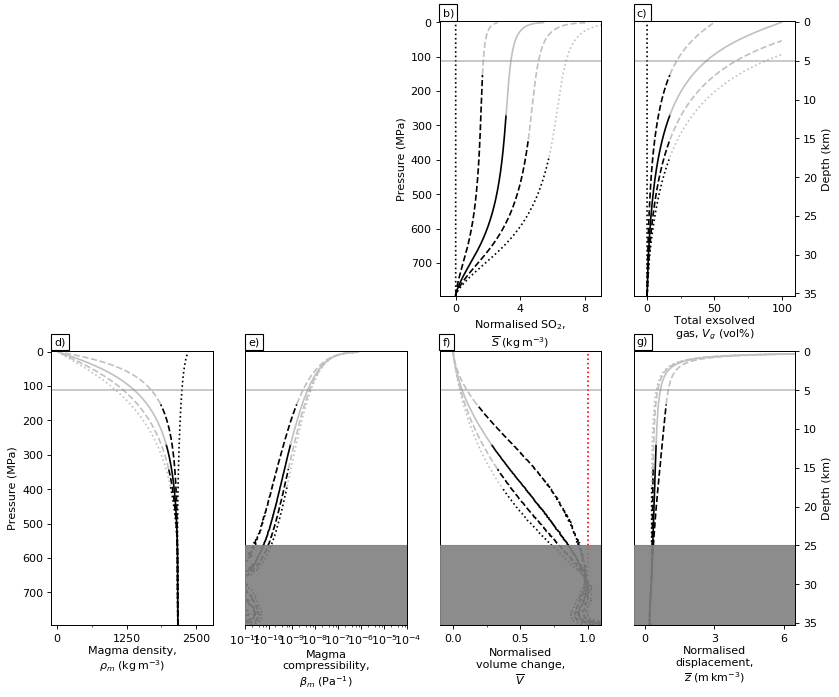

In [15]:
# Results
plt.figure(figsize=(12,10), dpi=80)
gs = plt.GridSpec(2,4)

# Normalised SO2
ax1 = plt.subplot(gs[0,2])
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['mS_released'][~np.isnan(rv0)], df_calc[0]['Pbar'][~np.isnan(rv0)]/10, c='k', linestyle = 'dotted')
ax1.plot(df_calc[1]['mS_released'][~np.isnan(rv1)][0:int(min_percolation1):20], df_calc[1]['Pbar'][~np.isnan(rv1)][0:int(min_percolation1):20]/10, c='k', linestyle = 'dashed')
ax1.plot(df_calc[1]['mS_released'][~np.isnan(rv1)][int(min_percolation1):-1:20], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1:20]/10, c='silver', linestyle = 'dashed')
ax1.plot(df_calc[2]['mS_released'][~np.isnan(rv2)][0:int(min_percolation2):20], df_calc[2]['Pbar'][~np.isnan(rv2)][0:int(min_percolation2):20]/10, c='k', linestyle = '-')
ax1.plot(df_calc[2]['mS_released'][~np.isnan(rv2)][int(min_percolation2):-1:20], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1:20]/10, c='silver', linestyle = '-')
ax1.plot(df_calc[3]['mS_released'][~np.isnan(rv3)][0:int(min_percolation3):20], df_calc[3]['Pbar'][~np.isnan(rv3)][0:int(min_percolation3):20]/10, c='k', linestyle = 'dashed')
ax1.plot(df_calc[3]['mS_released'][~np.isnan(rv3)][int(min_percolation3):-1:20], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1:20]/10, c='silver', linestyle = 'dashed')
ax1.plot(df_calc[4]['mS_released'][~np.isnan(rv4)][0:int(min_percolation4):20], df_calc[4]['Pbar'][~np.isnan(rv4)][0:int(min_percolation4):20]/10, c='k', linestyle = 'dotted')
ax1.plot(df_calc[4]['mS_released'][~np.isnan(rv4)][int(min_percolation4):-1:20], df_calc[4]['Pbar'][~np.isnan(rv4)][int(min_percolation4):-1:20]/10, c='silver', linestyle = 'dotted')
ax1.set_xlabel('Normalised $\mathrm{SO_2}$,\n' + r'$\overline{S}$ (kg$\,$m$^{-3}$)')
ax1.set_ylabel('Pressure (MPa)')
ax1.set_ylim((df_calc[2]['Pbar'].iloc[-1]-27.45)/10, df_calc[2]['Pbar'].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[2]['depth'].iloc[-1]-0.1,df_calc[2]['depth'].iloc[0])
ax2.axhline(y=res_depth, color='grey', alpha=0.5)
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(4))
ax2.set_yticks([])
ax1.set_xlim(-1, 9)
textstr = 'b)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

# Remove Vgas > 100
Exsolv_vol_wt_1_5 = (1.5*df_calc[3]['Exsolv_vol_wt']<100).to_numpy().nonzero()[0]
Exsolv_vol_wt_1_5 = np.delete(Exsolv_vol_wt_1_5,0)
Exsolv_vol_wt_2 = (2.0*df_calc[4]['Exsolv_vol_wt']<100).to_numpy().nonzero()[0]
Exsolv_vol_wt_2 = np.delete(Exsolv_vol_wt_2,0)

# Total exsolved volatiles
ax1 = plt.subplot(gs[0,3])
ax2 = ax1.twinx()
ax1.plot(0*df_calc[0]['Exsolv_vol_wt'][~np.isnan(rv0)], df_calc[0]['Pbar'][~np.isnan(rv0)], c='k', linestyle = 'dotted')
ax1.plot(0.5*df_calc[1]['Exsolv_vol_wt'][~np.isnan(rv1)][0:int(min_percolation1):20], df_calc[1]['Pbar'][~np.isnan(rv1)][0:int(min_percolation1):20], c='k', linestyle = 'dashed')
ax1.plot(0.5*df_calc[1]['Exsolv_vol_wt'][~np.isnan(rv1)][int(min_percolation1):-1:20], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1:20], c='silver', linestyle = 'dashed')
ax1.plot(1*df_calc[2]['Exsolv_vol_wt'][~np.isnan(rv2)][0:int(min_percolation2)], df_calc[2]['Pbar'][~np.isnan(rv2)][0:int(min_percolation2)], c='k', linestyle = '-')
ax1.plot(1*df_calc[2]['Exsolv_vol_wt'][~np.isnan(rv2)][int(min_percolation2):-1], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1], c='silver', linestyle = '-')
ax1.plot(1.5*df_calc[3]['Exsolv_vol_wt'][~np.isnan(rv3)][Exsolv_vol_wt_1_5][0:int(min_percolation3)], df_calc[3]['Pbar'][~np.isnan(rv3)][Exsolv_vol_wt_1_5][0:int(min_percolation3)], c='k', linestyle = 'dashed')
ax1.plot(1.5*df_calc[3]['Exsolv_vol_wt'][~np.isnan(rv3)][Exsolv_vol_wt_1_5][int(min_percolation3):-1], df_calc[3]['Pbar'][~np.isnan(rv3)][Exsolv_vol_wt_1_5][int(min_percolation3):-1], c='silver', linestyle = 'dashed')
ax1.plot(2*df_calc[4]['Exsolv_vol_wt'][~np.isnan(rv4)][Exsolv_vol_wt_2][0:int(min_percolation4)], df_calc[4]['Pbar'][~np.isnan(rv4)][Exsolv_vol_wt_2][0:int(min_percolation4)], c='k', linestyle = 'dotted')
ax1.plot(2*df_calc[4]['Exsolv_vol_wt'][~np.isnan(rv4)][Exsolv_vol_wt_2][int(min_percolation4):-1], df_calc[4]['Pbar'][~np.isnan(rv4)][Exsolv_vol_wt_2][int(min_percolation4):-1], c='silver', linestyle = 'dotted')
ax1.set_xlabel('Total exsolved\ngas, $V_{g}$ (vol%)')
ax1.set_ylim((df_calc[2]['Pbar'].iloc[-1]-27.45), df_calc[2]['Pbar'].iloc[0])
ax1.invert_yaxis()
ax2.set_ylim(df_calc[2]['depth'].iloc[-1]-0.1,df_calc[2]['depth'].iloc[0])
ax2.axhline(y=res_depth, color='grey', alpha=0.5)
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax2.set_ylabel('Depth (km)')
ax1.set_xlim(-10, 110)
ax1.set_yticks([])
textstr = 'c)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

# Remove melt data < 0
dd_dp_melt_nonzero = (df_calc[0]['dd_dp_melt']>0).to_numpy().nonzero()[0]
dd_dp_melt_nonzero = np.delete(dd_dp_melt_nonzero,0)

# Density
ax1 = plt.subplot(gs[1,0])
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['RhoBulk'][~np.isnan(rv0)][0:-1:20], df_calc[0]['Pbar'][~np.isnan(rv0)][0:-1:20]/10, c='k', linestyle = 'dotted')
ax1.plot(df_calc[1]['RhoBulk'][~np.isnan(rv1)][0:int(min_percolation1):20], df_calc[1]['Pbar'][~np.isnan(rv1)][0:int(min_percolation1):20]/10, c='k', linestyle = 'dashed')
ax1.plot(df_calc[1]['RhoBulk'][~np.isnan(rv1)][int(min_percolation1):-1:20], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1:20]/10, c='silver', linestyle = 'dashed')
ax1.plot(df_calc[2]['RhoBulk'][~np.isnan(rv2)][0:int(min_percolation2):20], df_calc[2]['Pbar'][~np.isnan(rv2)][0:int(min_percolation2):20]/10, c='k', linestyle = '-')
ax1.plot(df_calc[2]['RhoBulk'][~np.isnan(rv2)][int(min_percolation2):-1:20], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1:20]/10, c='silver', linestyle = '-')
ax1.plot(df_calc[3]['RhoBulk'][~np.isnan(rv3)][0:int(min_percolation3):20], df_calc[3]['Pbar'][~np.isnan(rv3)][0:int(min_percolation3):20]/10, c='k', linestyle = 'dashed')
ax1.plot(df_calc[3]['RhoBulk'][~np.isnan(rv3)][int(min_percolation3):-1:20], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1:20]/10, c='silver', linestyle = 'dashed')
ax1.plot(df_calc[4]['RhoBulk'][~np.isnan(rv4)][0:int(min_percolation4):20], df_calc[4]['Pbar'][~np.isnan(rv4)][0:int(min_percolation4):20]/10, c='k', linestyle = 'dotted')
ax1.plot(df_calc[4]['RhoBulk'][~np.isnan(rv4)][int(min_percolation4):-1:20], df_calc[4]['Pbar'][~np.isnan(rv4)][int(min_percolation4):-1:20]/10, c='silver', linestyle = 'dotted')
ax1.set_xlabel('Magma density,\n' + r'$\rho_{m}$ (kg$\,$m$^{-3}$)')
ax1.set_ylabel('Pressure (MPa)')
ax1.set_ylim((df_calc[2]['Pbar'].iloc[-1]-27.45)/10, df_calc[2]['Pbar'].iloc[0]/10)
ax1.invert_yaxis()
ax2.set_ylim(df_calc[2]['depth'].iloc[-1]-0.1,df_calc[2]['depth'].iloc[0])
ax2.axhline(y=res_depth, color='grey', alpha=0.5)
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1250))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(625))
ax1.set_xlim(-100, 2800)
ax2.set_yticks([])
textstr = 'd)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)


# Compressibility
ax1 = plt.subplot(gs[1,1])
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['beta_bulk'][~np.isnan(rv0)][dd_dp_melt_nonzero][0:-1:20], df_calc[0]['Pbar'][~np.isnan(rv0)][dd_dp_melt_nonzero][0:-1:20], c='k', linestyle = 'dotted')
ax1.plot(df_calc[1]['beta_bulk'][~np.isnan(rv1)][1:int(min_percolation1):20], df_calc[1]['Pbar'][~np.isnan(rv1)][1:int(min_percolation1):20], c='k', linestyle = 'dashed')
ax1.plot(df_calc[1]['beta_bulk'][~np.isnan(rv1)][int(min_percolation1):-1:20], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1:20], c='silver', linestyle = 'dashed')
ax1.plot(df_calc[2]['beta_bulk'][~np.isnan(rv2)][1:int(min_percolation2):20], df_calc[2]['Pbar'][~np.isnan(rv2)][1:int(min_percolation2):20], c='k', linestyle = '-')
ax1.plot(df_calc[2]['beta_bulk'][~np.isnan(rv2)][int(min_percolation2):-1:20], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1:20], c='silver', linestyle = '-')
ax1.plot(df_calc[3]['beta_bulk'][~np.isnan(rv3)][1:int(min_percolation3):20], df_calc[3]['Pbar'][~np.isnan(rv3)][1:int(min_percolation3):20], c='k', linestyle = 'dashed')
ax1.plot(df_calc[3]['beta_bulk'][~np.isnan(rv3)][int(min_percolation3):-1:20], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1:20], c='silver', linestyle = 'dashed')
ax1.plot(df_calc[4]['beta_bulk'][~np.isnan(rv4)][1:int(min_percolation4):20], df_calc[4]['Pbar'][~np.isnan(rv4)][1:int(min_percolation4):20], c='k', linestyle = 'dotted')
ax1.plot(df_calc[4]['beta_bulk'][~np.isnan(rv4)][int(min_percolation4):-1:20], df_calc[4]['Pbar'][~np.isnan(rv4)][int(min_percolation4):-1:20], c='silver', linestyle = 'dotted')
ax1.set_xlabel('Magma\ncompressibility,\n' + r'$\beta_{m}$ (Pa$^{-1}$)')
ax1.set_xscale('log')
ax1.set_xlim(0.00000000001, 0.0001)
ax1.set_ylim((df_calc[2]['Pbar'].iloc[-1]-27.45), df_calc[2]['Pbar'].iloc[0])
ax1.invert_yaxis()
ax2.set_ylim(df_calc[2]['depth'].iloc[-1]-0.1,df_calc[2]['depth'].iloc[0])
ax2.axhline(y=res_depth, color='grey', alpha=0.5)
ax2.invert_yaxis()
locmaj = mpl.ticker.LogLocator(base=10, numticks=10)
ax1.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=10)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.set_yticks([])
ax2.set_yticks([])
rect = mpl.patches.Rectangle((0.00000000001,df_calc[3]['depth'].iloc[0]), 0.0001+0.00000000001, 25-df_calc[3]['depth'].iloc[0], linewidth=1, edgecolor='gray', facecolor='gray', zorder=3, alpha = 0.9)
ax2.add_patch(rect)
textstr = 'e)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)


# Normalised volume change
ax1 = plt.subplot(gs[1,2])
ax2 = ax1.twinx()
ax1.plot(1/df_calc[0]['rv_bulk'][~np.isnan(rv0)][dd_dp_melt_nonzero][0:-1:20], df_calc[0]['Pbar'][~np.isnan(rv0)][dd_dp_melt_nonzero][0:-1:20], c='k', linestyle = 'dotted')
ax1.plot(np.ones(len(df_calc[0]['rv_bulk']))[~np.isnan(rv0)][0:-1:20], df_calc[0]['Pbar'][~np.isnan(rv0)][0:-1:20], c='r', linestyle = 'dotted')
ax1.plot(1/df_calc[1]['rv_bulk'][~np.isnan(rv1)][1:int(min_percolation1):20], df_calc[1]['Pbar'][~np.isnan(rv1)][1:int(min_percolation1):20], c='k', linestyle = 'dashed')
ax1.plot(1/df_calc[1]['rv_bulk'][~np.isnan(rv1)][int(min_percolation1):-1:20], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1:20], c='silver', linestyle = 'dashed')
ax1.plot(1/df_calc[2]['rv_bulk'][~np.isnan(rv2)][1:int(min_percolation2):20], df_calc[2]['Pbar'][~np.isnan(rv2)][1:int(min_percolation2):20], c='k', linestyle = '-')
ax1.plot(1/df_calc[2]['rv_bulk'][~np.isnan(rv2)][int(min_percolation2):-1:20], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1:20], c='silver', linestyle = '-')
ax1.plot(1/df_calc[3]['rv_bulk'][~np.isnan(rv3)][1:int(min_percolation3):20], df_calc[3]['Pbar'][~np.isnan(rv3)][1:int(min_percolation3):20], c='k', linestyle = 'dashed')
ax1.plot(1/df_calc[3]['rv_bulk'][~np.isnan(rv3)][int(min_percolation3):-1:20], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1:20], c='silver', linestyle = 'dashed')
ax1.plot(1/df_calc[4]['rv_bulk'][~np.isnan(rv4)][1:int(min_percolation4):20], df_calc[4]['Pbar'][~np.isnan(rv4)][1:int(min_percolation4):20], c='k', linestyle = 'dotted')
ax1.plot(1/df_calc[4]['rv_bulk'][~np.isnan(rv4)][int(min_percolation4):-1:20], df_calc[4]['Pbar'][~np.isnan(rv4)][int(min_percolation4):-1:20], c='silver', linestyle = 'dotted')
ax1.set_xlabel('Normalised\nvolume change,\n$\overline{V}$')
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim((df_calc[2]['Pbar'].iloc[-1]-27.45), df_calc[2]['Pbar'].iloc[0])
ax1.invert_yaxis()
ax2.set_ylim(df_calc[2]['depth'].iloc[-1]-0.1,df_calc[2]['depth'].iloc[0])
ax2.axhline(y=res_depth, color='grey', alpha=0.5)
#         ax2.axvline(x=1, color='k', linestyle = 'dotted')
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax1.set_yticks([])
ax2.set_yticks([])
rect = mpl.patches.Rectangle((-0.1,df_calc[3]['depth'].iloc[0]), 1.2, 25-df_calc[3]['depth'].iloc[0], linewidth=1, edgecolor='gray', facecolor='gray', zorder=9, alpha = 0.9)
ax2.add_patch(rect)
textstr = 'f)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)


# Normalised displacement
ax1 = plt.subplot(gs[1,3])
ax2 = ax1.twinx()
ax1.plot(df_calc[0]['z_bulk'][~np.isnan(rv0)][dd_dp_melt_nonzero][0:-1:20], df_calc[0]['Pbar'][~np.isnan(rv0)][dd_dp_melt_nonzero][0:-1:20], c='k', linestyle = 'dotted')
ax1.plot(df_calc[1]['z_bulk'][~np.isnan(rv1)][1:int(min_percolation1):20], df_calc[1]['Pbar'][~np.isnan(rv1)][1:int(min_percolation1):20], c='k', linestyle = 'dashed')
ax1.plot(df_calc[1]['z_bulk'][~np.isnan(rv1)][int(min_percolation1):-1:20], df_calc[1]['Pbar'][~np.isnan(rv1)][int(min_percolation1):-1:20], c='silver', linestyle = 'dashed')
ax1.plot(df_calc[2]['z_bulk'][~np.isnan(rv2)][1:int(min_percolation2):20], df_calc[2]['Pbar'][~np.isnan(rv2)][1:int(min_percolation2):20], c='k', linestyle = '-')
ax1.plot(df_calc[2]['z_bulk'][~np.isnan(rv2)][int(min_percolation2):-1:20], df_calc[2]['Pbar'][~np.isnan(rv2)][int(min_percolation2):-1:20], c='silver', linestyle = '-')
ax1.plot(df_calc[3]['z_bulk'][~np.isnan(rv3)][1:int(min_percolation3):20], df_calc[3]['Pbar'][~np.isnan(rv3)][1:int(min_percolation3):20], c='k', linestyle = 'dashed')
ax1.plot(df_calc[3]['z_bulk'][~np.isnan(rv3)][int(min_percolation3):-1:20], df_calc[3]['Pbar'][~np.isnan(rv3)][int(min_percolation3):-1:20], c='silver', linestyle = 'dashed')
ax1.plot(df_calc[4]['z_bulk'][~np.isnan(rv4)][1:int(min_percolation4):20], df_calc[4]['Pbar'][~np.isnan(rv4)][1:int(min_percolation4):20], c='k', linestyle = 'dotted')
ax1.plot(df_calc[4]['z_bulk'][~np.isnan(rv4)][int(min_percolation4):-1:20], df_calc[4]['Pbar'][~np.isnan(rv4)][int(min_percolation4):-1:20], c='silver', linestyle = 'dotted')
ax1.set_xlabel('Normalised\ndisplacement,\n$\overline{z}$ (m$\,$km$^{-3}$)')
ax1.set_xlim(-0.5, 6.5)
ax1.set_ylim((df_calc[2]['Pbar'].iloc[-1]-27.45), df_calc[2]['Pbar'].iloc[0])
ax1.invert_yaxis()
ax2.set_ylim(df_calc[2]['depth'].iloc[-1]-0.1,df_calc[2]['depth'].iloc[0])
ax2.axhline(y=res_depth, color='grey', alpha=0.5)
ax2.invert_yaxis()
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax1.set_yticks([])
ax2.set_ylabel('Depth (km)')
rect = mpl.patches.Rectangle((-0.5,df_calc[3]['depth'].iloc[0]), 7, 25-df_calc[3]['depth'].iloc[0], linewidth=1, edgecolor='gray', facecolor='gray', zorder=3, alpha = 0.9)
ax2.add_patch(rect)
textstr = 'g)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.02, 1.05, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)


## 6. Comparison to observed eruptions

In [16]:
# Read in model predictions
# Read in basalt
df_basalt = []
k = ['-0.8', '0', '+1', '_ARC']
for j in range(0,len(k)):
    add_df_calc = home_dir + f"E_dgs_oibk{k[j]}.txt"
    df_basalt = df_basalt + [pd.read_csv(add_df_calc, sep='\t')]

# Read in 5wt% H2O rhyolite
df_rhyolite_5H2O = []
k = ['-1', '0', '+1', '_15wt']
for j in range(0,len(k)):
    add_df_calc = home_dir + f"E_dgs_5H2O_rhyolitek{k[j]}.txt"
    df_rhyolite_5H2O = df_rhyolite_5H2O + [pd.read_csv(add_df_calc, sep='\t')]
    
# Read in 5wt% H2O rhyolite w/ varying S
df_rhyolite_S = []
S = ['1800', '3000', '4200']
for j in range(0,len(S)):
    add_df_calc = home_dir + f"E_S_{S[j]}.txt"
    df_rhyolite_S = df_rhyolite_S + [pd.read_csv(add_df_calc, sep='\t')]
    
# Read in rhyolite: 5wt H2O & MI
df_rhyolite_rhy = []
rhy = ['MI', '5wt']
for j in range(0,len(rhy)):
    add_df_calc = home_dir + f"E_rhyolite_{rhy[j]}.txt"
    df_rhyolite_rhy = df_rhyolite_rhy + [pd.read_csv(add_df_calc, sep='\t')]
    

### Fig. 6

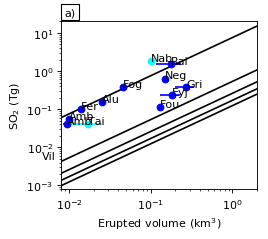

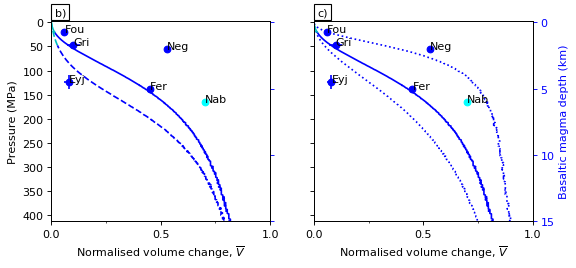

In [17]:
# Observations vs model - basalt
fig = plt.figure(figsize=(12,10), dpi=80)
gs = plt.GridSpec(3,3)
gs.update(wspace=0.4,hspace=0.3)

# Observations of SO2
ax1 = plt.subplot(gs[0,0])
ax1.errorbar(df_obs['Erupted volume (km3)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             df_obs['SO2 (Tg)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             xerr=df_obs['Erupted volume uncertainty (km3)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             yerr=df_obs['SO2 uncertainty (Tg)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             color='blue', fmt='o', mfc='blue')

ax1.errorbar(df_obs['Erupted volume (km3)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             df_obs['SO2 (Tg)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             xerr=df_obs['Erupted volume uncertainty (km3)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             yerr=df_obs['SO2 uncertainty (Tg)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             color='cyan', fmt='o', mfc='cyan')
ax1.set_ylabel('$\mathrm{SO_2}$ (Tg)')
ax1.set_xlim(8e-3,2e0)
ax1.set_xscale('log')
ax1.set_xlabel('Erupted volume ' + r'(km$^{3}$)')
ax1.set_ylim(8e-4,2e1)
ax1.set_yscale('log')
textstr = 'a)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.016, 1.085, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

# comparison to model prediction
basalt_x = [0.001, 10]
basalt_y = [0.01, 100]
andesite_x = [0.001, 10]
andesite_y = [0.001, 10]
rhyolite_x = [0.001, 10]
rhyolite_y = [0.0001, 1]

basalt_x_0 = [0.001, 0.1, 10]
basalt_y_0 = [0.00755, 0.755, 75.5]
ax1.plot(basalt_x_0, basalt_y_0, 'k', label='0km')

basalt_x_2 = [0.001, 0.1, 10]
basalt_y_2 = [0.000535, 0.0535, 5.35]
ax1.plot(basalt_x_2, basalt_y_2, color='black', label='2km')

basalt_x_4 = [0.001, 0.1, 10]
basalt_y_4 = [0.000261, 0.0261, 2.61]
ax1.plot(basalt_x_4, basalt_y_4, 'k', label='4km')

basalt_x_6 = [0.001, 0.1, 10]
basalt_y_6 = [0.000171, 0.0171, 1.71]
ax1.plot(basalt_x_6, basalt_y_6, 'k', label='6km')

basalt_x_8 = [0.001, 0.1, 10]
basalt_y_8 = [0.000124, 0.0124, 1.24]
ax1.plot(basalt_x_8, basalt_y_8, 'k', label='8km')

for print_volname in range(len(df_obs['Volume change (km3)'])):
    if ~np.isnan(df_obs['SO2 (Tg)'][print_volname]) == True and df_obs['Erupted volume (km3)'][print_volname]>0 and df_obs['SO2 (Tg)'][print_volname]>0:
        if df_obs['Dominant Rock Type'][print_volname] == 'Basalt / Picro-Basalt' or df_obs['Dominant Rock Type'][print_volname] == 'Trachybasalt / Tephrite Basanite':
            
            ax1.text(df_obs['Erupted volume (km3)'][~np.isnan(df_obs['SO2 (Tg)'])][print_volname],
                     df_obs['SO2 (Tg)'][~np.isnan(df_obs['SO2 (Tg)'])][print_volname],
                     df_obs['Volcano Name'][~np.isnan(df_obs['SO2 (Tg)'])][print_volname][0:3])
        
# plot normalised volume change
fig = plt.figure(figsize=(12,10), dpi=80)
gs = plt.GridSpec(3,3)
gs.update(hspace=0.25,top=1)
min_percolation=np.where(df_basalt[2]['Exsolv_vol_wt'] == find_nearest(df_basalt[2]['Exsolv_vol_wt'][~np.isnan(df_basalt[2]['Exsolv_vol_wt'])], 37)) #find position of depth closest to res_depth
min_percolation=float(min_percolation[0])

# normalised volume change - water-rich water-poor
ax1 = plt.subplot(gs[0,0])
ax2 = ax1.twinx()
ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             color='blue', fmt='o', mfc='blue',label='Basalt / Picro-Basalt')
ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             color='cyan', fmt='o', mfc='cyan',label='Trachybasalt / Tephrite Basanite')
ax1.plot(1/df_basalt[1]['rv_bulk'][0:int(min_percolation):10],df_basalt[1]['Pbar'][0:int(min_percolation):10]/10, color='b', linestyle = '-')
ax1.plot(1/df_basalt[1]['rv_bulk'][int(min_percolation):-1:10],df_basalt[1]['Pbar'][int(min_percolation):-1:10]/10, color='c', linestyle = '-')
ax1.plot(1/df_basalt[3]['rv_bulk'][0:int(min_percolation):10],df_basalt[3]['Pbar'][0:int(min_percolation):10]/10, color='b', linestyle = 'dashed')
ax1.plot(1/df_basalt[3]['rv_bulk'][int(min_percolation):-1:10],df_basalt[3]['Pbar'][int(min_percolation):-1:10]/10, color='c', linestyle = 'dashed')
ax1.set_xlabel('Normalised volume change, $\overline{V}$')
ax1.set_xlim(-0.0, 1.0)
ax1.set_ylim(-26.45/10,4116/10)
ax1.invert_yaxis()
ax2.set_ylim(-0.09635569,15)
ax2.invert_yaxis()
ax1.set_ylabel('Pressure (MPa)')
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax2.yaxis.set_ticklabels([])
ax2.tick_params(axis='y', colors='blue')
ax2.yaxis.label.set_color('blue')
textstr = 'b)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.015, 1.07, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
for print_volname in range(len(df_obs['Normalised volume change'])):
    if ~np.isnan(df_obs['Normalised volume change'][print_volname]) == True and df_obs['Normalised volume change'][print_volname]<1:
        if df_obs['Dominant Rock Type'][print_volname] == 'Basalt / Picro-Basalt' or df_obs['Dominant Rock Type'][print_volname] == 'Trachybasalt / Tephrite Basanite':
            ax2.text(df_obs['Normalised volume change'][~np.isnan(df_obs['Normalised volume change'])][print_volname],
                     df_obs['Depth (km)'][~np.isnan(df_obs['Normalised volume change'])][print_volname],
                     df_obs['Volcano Name'][~np.isnan(df_obs['Normalised volume change'])][print_volname][0:3])


# normalised volume change - gas segregation
min_percolation=np.where(df_basalt[2]['Exsolv_vol_wt'] == find_nearest(df_basalt[2]['Exsolv_vol_wt'][~np.isnan(df_basalt[2]['Exsolv_vol_wt'])], 37)) #find position of depth closest to res_depth
min_percolation=float(min_percolation[0])
ax1 = plt.subplot(gs[0,1])
ax2 = ax1.twinx()
ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Basalt / Picro-Basalt'],
             color='blue', fmt='o', mfc='blue',label='Basalt / Picro-Basalt')
ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Trachybasalt / Tephrite Basanite'],
             color='cyan', fmt='o', mfc='cyan',label='Trachybasalt / Tephrite Basanite')
ax1.plot(1/df_basalt[0]['rv_bulk'][0:int(min_percolation):10],df_basalt[0]['Pbar'][0:int(min_percolation):10]/10, color='b', linestyle = 'dotted')
ax1.plot(1/df_basalt[0]['rv_bulk'][int(min_percolation):-1:10],df_basalt[0]['Pbar'][int(min_percolation):-1:10]/10, color='c', linestyle = 'dotted')
ax1.plot(1/df_basalt[1]['rv_bulk'][0:int(min_percolation):10],df_basalt[1]['Pbar'][0:int(min_percolation):10]/10, color='b', linestyle = '-')
ax1.plot(1/df_basalt[1]['rv_bulk'][int(min_percolation):-1:10],df_basalt[1]['Pbar'][int(min_percolation):-1:10]/10, color='c', linestyle = '-')
ax1.plot(1/df_basalt[2]['rv_bulk'][0:int(min_percolation):10],df_basalt[2]['Pbar'][0:int(min_percolation):10]/10, color='b', linestyle = 'dotted')
ax1.plot(1/df_basalt[2]['rv_bulk'][int(min_percolation):-1:10],df_basalt[2]['Pbar'][int(min_percolation):-1:10]/10, color='c', linestyle = 'dotted')
ax1.set_xlabel('Normalised volume change, $\overline{V}$')
ax1.set_xlim(-0.0, 1.0)
ax1.set_ylim(-26.45/10,4116/10)
ax1.invert_yaxis()
ax2.set_ylim(-0.09635569,15)
ax2.invert_yaxis()
ax1.yaxis.set_ticklabels([])
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax2.set_ylabel('Depth (km)')
ax2.set_ylabel('Basaltic magma depth (km)')
ax2.tick_params(axis='y', colors='blue')
ax2.yaxis.label.set_color('blue')
textstr = 'c)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.015, 1.07, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
for print_volname in range(len(df_obs['Normalised volume change'])):
    if ~np.isnan(df_obs['Normalised volume change'][print_volname]) == True and df_obs['Normalised volume change'][print_volname]<1:
        if df_obs['Dominant Rock Type'][print_volname] == 'Basalt / Picro-Basalt' or df_obs['Dominant Rock Type'][print_volname] == 'Trachybasalt / Tephrite Basanite':
            ax2.text(df_obs['Normalised volume change'][~np.isnan(df_obs['Normalised volume change'])][print_volname],
                     df_obs['Depth (km)'][~np.isnan(df_obs['Normalised volume change'])][print_volname],
                     df_obs['Volcano Name'][~np.isnan(df_obs['Normalised volume change'])][print_volname][0:3])


### Fig. 7

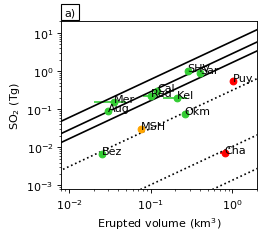

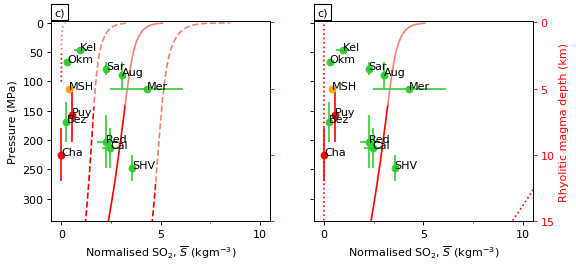

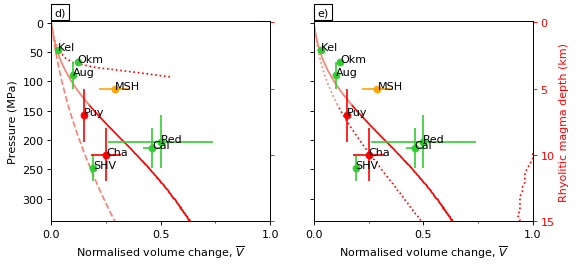

In [19]:
# Observations vs model - rhyolite
fig = plt.figure(figsize=(12,10), dpi=80)
gs = plt.GridSpec(3,3)
gs.update(wspace=0.4,hspace=0.3)

# Observations of SO2
ax1 = plt.subplot(gs[0,1])
ax1.errorbar(df_obs['Erupted volume (km3)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             df_obs['SO2 (Tg)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             xerr=df_obs['Erupted volume uncertainty (km3)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             yerr=df_obs['SO2 uncertainty (Tg)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             color='limegreen', fmt='o', mfc='limegreen')

ax1.errorbar(df_obs['Erupted volume (km3)'][df_obs['Dominant Rock Type']=='Dacite'],
             df_obs['SO2 (Tg)'][df_obs['Dominant Rock Type']=='Dacite'],
             xerr=df_obs['Erupted volume uncertainty (km3)'][df_obs['Dominant Rock Type']=='Dacite'],
             yerr=df_obs['SO2 uncertainty (Tg)'][df_obs['Dominant Rock Type']=='Dacite'],
             color='orange', fmt='o', mfc='orange')

ax1.errorbar(df_obs['Erupted volume (km3)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             df_obs['SO2 (Tg)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             xerr=df_obs['Erupted volume uncertainty (km3)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             yerr=df_obs['SO2 uncertainty (Tg)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             color='red', fmt='o', mfc='red')
ax1.set_ylabel('$\mathrm{SO_2}$ (Tg)')
ax1.set_xlim(8e-3,2e0)
ax1.set_xscale('log')
ax1.set_xlabel('Erupted volume ' + r'(km$^{3}$)')
ax1.set_ylim(8e-4,2e1)
ax1.set_yscale('log')
textstr = 'a)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.016, 1.085, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)

# comparison to model prediction
# fractional crystallisation
rhyolite_x_0 = [0.001, 0.1, 10]
rhyolite_y_0 = [0.00605, 0.605, 60.5]
ax1.plot(rhyolite_x_0, rhyolite_y_0, 'k', label='0km')

rhyolite_x_10 = [0.001, 0.1, 10]
rhyolite_y_10 = [0.00288, 0.288, 28.8]
ax1.plot(rhyolite_x_10, rhyolite_y_10, 'k', label='10km')

rhyolite_x_20 = [0.001, 0.1, 10]
rhyolite_y_20 = [0.00168, 0.168, 16.8]
ax1.plot(rhyolite_x_20, rhyolite_y_20, 'k', label='20km')

# melt inclusion
rhyolite_MI_x_0 = [0.001, 0.1, 10]
rhyolite_MI_y_0 = [0.000315, 0.0315, 3.15]
ax1.plot(rhyolite_MI_x_0, rhyolite_MI_y_0, 'k:', label='0km')

rhyolite_MI_x_2 = [0.001, 0.1, 10]
rhyolite_MI_y_2 = [0.0000105, 0.00105 ,0.105]
ax1.plot(rhyolite_MI_x_2, rhyolite_MI_y_2, 'k:', label='2km')

rhyolite_MI_x_4 = [0.001, 0.1, 10]
rhyolite_MI_y_4 = [0.00000138, 0.000138, 0.0138]
ax1.plot(rhyolite_MI_x_4, rhyolite_MI_y_4, 'k:', label='4km')


for print_volname in range(len(df_obs['Volume change (km3)'])):
    if ~np.isnan(df_obs['SO2 (Tg)'][print_volname]) == True and df_obs['Erupted volume (km3)'][print_volname]>0 and df_obs['SO2 (Tg)'][print_volname]>0:
        if df_obs['Dominant Rock Type'][print_volname] == 'Dacite' or df_obs['Dominant Rock Type'][print_volname] == 'Trachyte / Trachydacite' or df_obs['Dominant Rock Type'][print_volname] == 'Rhyolite' or df_obs['Dominant Rock Type'][print_volname] == 'Andesite / Basaltic Andesite':
            ax1.text(df_obs['Erupted volume (km3)'][~np.isnan(df_obs['SO2 (Tg)'])][print_volname],
                     df_obs['SO2 (Tg)'][~np.isnan(df_obs['SO2 (Tg)'])][print_volname],
                     df_obs['Volcano Name'][~np.isnan(df_obs['SO2 (Tg)'])][print_volname][0:3])

#########################################################################################################################################
# plot normalised SO2
fig = plt.figure(figsize=(12,10), dpi=80)
gs = plt.GridSpec(3,3)
gs.update(hspace=0.25,top=1)

# normalised SO2 - sulfur-rich sulfur-poor
ax1 = plt.subplot(gs[0,0])
ax2 = ax1.twinx()
        
# percolation threshold - sulfur-rich sulfur-poor
min_percolation0=np.where(df_rhyolite_rhy[0]['Exsolv_vol_wt'] == find_nearest(df_rhyolite_rhy[0]['Exsolv_vol_wt'][~np.isnan(df_rhyolite_rhy[0]['Exsolv_vol_wt'])], 17)) #find position of depth closest to res_depth
min_percolation0=float(min_percolation0[0])
min_percolation1=np.where(df_rhyolite_rhy[1]['Exsolv_vol_wt'] == find_nearest(df_rhyolite_rhy[1]['Exsolv_vol_wt'][~np.isnan(df_rhyolite_rhy[1]['Exsolv_vol_wt'])], 17)) #find position of depth closest to res_depth
min_percolation1=float(min_percolation1[0])
min_percolation_S0=np.where(df_rhyolite_S[0]['Exsolv_vol_wt'] == find_nearest(df_rhyolite_S[0]['Exsolv_vol_wt'][~np.isnan(df_rhyolite_S[0]['Exsolv_vol_wt'])], 17)) #find position of depth closest to res_depth
min_percolation_S0=float(min_percolation_S0[0])
min_percolation_S2=np.where(df_rhyolite_S[2]['Exsolv_vol_wt'] == find_nearest(df_rhyolite_S[2]['Exsolv_vol_wt'][~np.isnan(df_rhyolite_S[2]['Exsolv_vol_wt'])], 17)) #find position of depth closest to res_depth
min_percolation_S2=float(min_percolation_S2[0])

ax2.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             color='limegreen', fmt='o', mfc='limegreen',label='Andesite / Basaltic Andesite')
ax2.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Dacite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Dacite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             color='orange', fmt='o', mfc='orange',label='Dacite')
ax2.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             color='red', fmt='o', mfc='red',label='Rhyolite')
ax1.plot(df_rhyolite_rhy[0]['mS_released'][0:int(min_percolation0):80],df_rhyolite_rhy[0]['Pbar'][0:int(min_percolation0):80]/10, color='r', linestyle = 'dotted')
ax1.plot(df_rhyolite_rhy[0]['mS_released'][int(min_percolation0):-1:10],df_rhyolite_rhy[0]['Pbar'][int(min_percolation0):-1:10]/10, color='salmon', linestyle = 'dotted')
ax1.plot(df_rhyolite_rhy[1]['mS_released'][0:int(min_percolation1):10],df_rhyolite_rhy[1]['Pbar'][0:int(min_percolation1):10]/10, color='r', linestyle = '-')
ax1.plot(df_rhyolite_rhy[1]['mS_released'][int(min_percolation1):-1:10],df_rhyolite_rhy[1]['Pbar'][int(min_percolation1):-1:10]/10, color='salmon', linestyle = '-')
ax1.plot(df_rhyolite_S[0]['mS_released'][0:int(min_percolation_S0):80],df_rhyolite_S[0]['Pbar'][0:int(min_percolation_S0):80]/10, color='r', linestyle = 'dashed')
ax1.plot(df_rhyolite_S[0]['mS_released'][int(min_percolation_S0):-1:10],df_rhyolite_S[0]['Pbar'][int(min_percolation_S0):-1:10]/10, color='salmon', linestyle = 'dashed')
ax1.plot(df_rhyolite_S[2]['mS_released'][0:int(min_percolation_S2):10],df_rhyolite_S[2]['Pbar'][0:int(min_percolation_S2):10]/10, color='r', linestyle = 'dashed')
ax1.plot(df_rhyolite_S[2]['mS_released'][int(min_percolation_S2):-1:10],df_rhyolite_S[2]['Pbar'][int(min_percolation_S2):-1:10]/10, color='salmon', linestyle = 'dashed')
ax1.set_xlabel('Normalised $\mathrm{SO_2}$, ' + r'$\overline{S}$ (kgm$^{-3}$)')
ax1.set_xlim(-0.5, 10.5)
ax1.set_ylim(-26.45/10,3381/10)
ax1.invert_yaxis()
ax2.set_ylim(-0.09635569,15)
ax2.invert_yaxis()
ax1.set_ylabel('Pressure (MPa)')
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax2.yaxis.set_ticklabels([])
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.label.set_color('red')
textstr = 'c)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.015, 1.07, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
for print_volname in range(len(df_obs['Normalised SO2 (Tg/km3)'])):
    if ~np.isnan(df_obs['Normalised SO2 (Tg/km3)'][print_volname]) == True and df_obs['Depth (km)'][print_volname]>0:
        if df_obs['Dominant Rock Type'][print_volname] == 'Dacite' or df_obs['Dominant Rock Type'][print_volname] == 'Trachyte / Trachydacite' or df_obs['Dominant Rock Type'][print_volname] == 'Rhyolite'  or df_obs['Dominant Rock Type'][print_volname] == 'Andesite / Basaltic Andesite':
            ax2.text(df_obs['Normalised SO2 (Tg/km3)'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])][print_volname],
                     df_obs['Depth (km)'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])][print_volname],
                     df_obs['Volcano Name'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])][print_volname][0:3])
                
# normalised SO2 - gas segregation
ax1 = plt.subplot(gs[0,1])
ax2 = ax1.twinx()
        
# percolation threshold - gas segregation
min_percolation=np.where(df_rhyolite_5H2O[1]['Exsolv_vol_wt'] == find_nearest(df_rhyolite_5H2O[1]['Exsolv_vol_wt'][~np.isnan(df_rhyolite_5H2O[1]['Exsolv_vol_wt'])], 17)) #find position of depth closest to res_depth
min_percolation=float(min_percolation[0])
df_rhyolite_5H2O_neg1 = (1/df_rhyolite_5H2O[0]['rv_bulk']<1).to_numpy().nonzero()[0]
df_rhyolite_5H2O_neg1 = np.delete(df_rhyolite_5H2O_neg1,0)
df_rhyolite_5H2O_0 = (1/df_rhyolite_5H2O[1]['rv_bulk']<1).to_numpy().nonzero()[0]
df_rhyolite_5H2O_0 = np.delete(df_rhyolite_5H2O_0,0)
df_rhyolite_5H2O_pos1 = (1/df_rhyolite_5H2O[2]['rv_bulk']<1).to_numpy().nonzero()[0]
df_rhyolite_5H2O_pos1 = np.delete(df_rhyolite_5H2O_pos1,0)
df_rhyolite_5H2O_pos10 = (1/df_rhyolite_5H2O[3]['rv_bulk']<1).to_numpy().nonzero()[0]
df_rhyolite_5H2O_pos10 = np.delete(df_rhyolite_5H2O_pos10,0)

ax2.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             color='limegreen', fmt='o', mfc='limegreen',label='Andesite / Basaltic Andesite')
ax2.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Dacite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Dacite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             color='orange', fmt='o', mfc='orange',label='Dacite')
ax2.errorbar(df_obs['Normalised SO2 (Tg/km3)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             xerr=df_obs['Normalised SO2 uncertainty (Tg/km3)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             color='red', fmt='o', mfc='red',label='Rhyolite')
ax1.plot(0*df_rhyolite_5H2O[0]['mS_released'],df_rhyolite_5H2O[0]['Pbar']/10, color='r', linestyle = 'dotted')
ax1.plot(df_rhyolite_5H2O[1]['mS_released'][0:int(min_percolation):10],df_rhyolite_5H2O[1]['Pbar'][0:int(min_percolation):10]/10, color='r', linestyle = '-')
ax1.plot(df_rhyolite_5H2O[1]['mS_released'][int(min_percolation):-1:10],df_rhyolite_5H2O[1]['Pbar'][int(min_percolation):-1:10]/10, color='salmon', linestyle = '-')
ax1.plot(2*df_rhyolite_5H2O[2]['mS_released'][0:int(min_percolation):10],df_rhyolite_5H2O[2]['Pbar'][0:int(min_percolation):10]/10, color='r', linestyle = 'dotted')
ax1.plot(2*df_rhyolite_5H2O[2]['mS_released'][int(min_percolation):-1:10],df_rhyolite_5H2O[2]['Pbar'][int(min_percolation):-1:10]/10, color='salmon', linestyle = 'dotted')
ax1.set_xlabel('Normalised $\mathrm{SO_2}$, ' + r'$\overline{S}$ (kgm$^{-3}$)')
ax1.set_xlim(-0.5, 10.5)
ax1.set_ylim(-26.45/10,3381/10)
ax1.invert_yaxis()
ax2.set_ylim(-0.09635569,15)
ax2.invert_yaxis()
ax1.yaxis.set_ticklabels([])
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax2.set_ylabel('Rhyolitic magma depth (km)')
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.label.set_color('red')
textstr = 'c)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.015, 1.07, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
for print_volname in range(len(df_obs['Normalised SO2 (Tg/km3)'])):
    if ~np.isnan(df_obs['Normalised SO2 (Tg/km3)'][print_volname]) == True and df_obs['Depth (km)'][print_volname]>0:
        if df_obs['Dominant Rock Type'][print_volname] == 'Dacite' or df_obs['Dominant Rock Type'][print_volname] == 'Rhyolite'  or df_obs['Dominant Rock Type'][print_volname] == 'Andesite / Basaltic Andesite':
            ax2.text(df_obs['Normalised SO2 (Tg/km3)'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])][print_volname],
                     df_obs['Depth (km)'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])][print_volname],
                     df_obs['Volcano Name'][~np.isnan(df_obs['Normalised SO2 (Tg/km3)'])][print_volname][0:3])

#########################################################################################################################################
# plot volume change
fig = plt.figure(figsize=(12,10), dpi=80)
gs = plt.GridSpec(3,3)
gs.update(hspace=0.25,top=1)

# normalised volume change - water-rich water-poor
ax1 = plt.subplot(gs[0,0])
ax2 = ax1.twinx()
        
# percolation threshold - water-rich water-poor
min_percolation=np.where(df_rhyolite_5H2O[2]['Exsolv_vol_wt'] == find_nearest(df_rhyolite_5H2O[2]['Exsolv_vol_wt'][~np.isnan(df_rhyolite_5H2O[2]['Exsolv_vol_wt'])], 17)) #find position of depth closest to res_depth
min_percolation=float(min_percolation[0])

ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             color='limegreen', fmt='o', mfc='limegreen',label='Andesite / Basaltic Andesite')
ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Dacite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Dacite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             color='orange', fmt='o', mfc='orange',label='Dacite')
ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Rhyolite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Rhyolite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             color='red', fmt='o', mfc='red',label='Rhyolite')
ax1.plot(1/df_rhyolite_rhy[0]['rv_bulk'][0:int(min_percolation0):80],df_rhyolite_rhy[0]['Pbar'][0:int(min_percolation0):80]/10, color='r', linestyle = 'dotted')
ax1.plot(1/df_rhyolite_rhy[0]['rv_bulk'][int(min_percolation0):-1:10],df_rhyolite_rhy[0]['Pbar'][int(min_percolation0):-1:10]/10, color='salmon', linestyle = 'dotted')
ax1.plot(1/df_rhyolite_5H2O[1]['rv_bulk'][0:int(min_percolation):10],df_rhyolite_5H2O[1]['Pbar'][0:int(min_percolation):10]/10, color='r', linestyle = '-')
ax1.plot(1/df_rhyolite_5H2O[1]['rv_bulk'][int(min_percolation):-1:10],df_rhyolite_5H2O[1]['Pbar'][int(min_percolation):-1:10]/10, color='salmon', linestyle = '-')
ax1.plot(1/df_rhyolite_5H2O[3]['rv_bulk'][0:int(min_percolation):10],df_rhyolite_5H2O[3]['Pbar'][0:int(min_percolation):10]/10, color='r', linestyle = 'dashed')
ax1.plot(1/df_rhyolite_5H2O[3]['rv_bulk'][int(min_percolation):-1:10],df_rhyolite_5H2O[3]['Pbar'][int(min_percolation):-1:10]/10, color='salmon', linestyle = 'dashed')
ax1.set_xlabel('Normalised volume change, $\overline{V}$')
ax1.set_xlim(-0.0, 1.0)
ax1.set_ylim(-26.45/10,3381/10)
ax1.invert_yaxis()
ax2.set_ylim(-0.09635569,15)
ax2.invert_yaxis()
ax1.set_ylabel('Pressure (MPa)')
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax2.yaxis.set_ticklabels([])
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.label.set_color('red')
textstr = 'd)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.015, 1.07, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
for print_volname in range(len(df_obs['Normalised volume change'])):
    if ~np.isnan(df_obs['Normalised volume change'][print_volname]) == True and df_obs['Normalised volume change'][print_volname]<1:
        if df_obs['Dominant Rock Type'][print_volname] == 'Dacite' or df_obs['Dominant Rock Type'][print_volname] == 'Trachyte / Trachydacite' or df_obs['Dominant Rock Type'][print_volname] == 'Rhyolite' or df_obs['Dominant Rock Type'][print_volname] == 'Andesite / Basaltic Andesite':
            ax2.text(df_obs['Normalised volume change'][~np.isnan(df_obs['Normalised volume change'])][print_volname],
                     df_obs['Depth (km)'][~np.isnan(df_obs['Normalised volume change'])][print_volname],
                     df_obs['Volcano Name'][~np.isnan(df_obs['Normalised volume change'])][print_volname][0:3])
        
# normalised volume change - gas segregation
ax1 = plt.subplot(gs[0,1])
ax2 = ax1.twinx()
        
# percolation threshold - gas segregation
min_percolation=np.where(df_rhyolite_5H2O[2]['Exsolv_vol_wt'] == find_nearest(df_rhyolite_5H2O[2]['Exsolv_vol_wt'][~np.isnan(df_rhyolite_5H2O[2]['Exsolv_vol_wt'])], 17)) #find position of depth closest to res_depth
min_percolation=float(min_percolation[0])

# Remove Vbar > 1
df_rhyolite_5H2O_neg1 = (1/df_rhyolite_5H2O[0]['rv_bulk']<1).to_numpy().nonzero()[0]
df_rhyolite_5H2O_neg1 = np.delete(df_rhyolite_5H2O_neg1,0)
df_rhyolite_5H2O_0 = (1/df_rhyolite_5H2O[1]['rv_bulk']<1).to_numpy().nonzero()[0]
df_rhyolite_5H2O_0 = np.delete(df_rhyolite_5H2O_0,0)
df_rhyolite_5H2O_pos1 = (1/df_rhyolite_5H2O[2]['rv_bulk']<1).to_numpy().nonzero()[0]
df_rhyolite_5H2O_pos1 = np.delete(df_rhyolite_5H2O_pos1,0)
df_rhyolite_5H2O_pos10 = (1/df_rhyolite_5H2O[3]['rv_bulk']<1).to_numpy().nonzero()[0]
df_rhyolite_5H2O_pos10 = np.delete(df_rhyolite_5H2O_pos10,0)

# Normalised volume change
ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Andesite / Basaltic Andesite'],
             color='limegreen', fmt='o', mfc='limegreen',label='Andesite / Basaltic Andesite')
ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Dacite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Dacite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Dacite'],
             color='orange', fmt='o', mfc='orange',label='Dacite')
ax2.errorbar(df_obs['Normalised volume change'][df_obs['Dominant Rock Type']=='Rhyolite'],
             df_obs['Depth (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             xerr=df_obs['Normalised volume change uncertainty'][df_obs['Dominant Rock Type']=='Rhyolite'],
             yerr=df_obs['Depth uncertainty (km)'][df_obs['Dominant Rock Type']=='Rhyolite'],
             color='red', fmt='o', mfc='red',label='Rhyolite')
ax1.plot(1/df_rhyolite_5H2O[0]['rv_bulk'][0:int(min_percolation):80],df_rhyolite_5H2O[0]['Pbar'][0:int(min_percolation):80]/10, color='r', linestyle = 'dotted')
ax1.plot(1/df_rhyolite_5H2O[1]['rv_bulk'][0:int(min_percolation):10],df_rhyolite_5H2O[1]['Pbar'][0:int(min_percolation):10]/10, color='r', linestyle = '-')
ax1.plot(1/df_rhyolite_5H2O[1]['rv_bulk'][int(min_percolation):-1:10],df_rhyolite_5H2O[1]['Pbar'][int(min_percolation):-1:10]/10, color='salmon', linestyle = '-')
ax1.plot(1/df_rhyolite_5H2O[2]['rv_bulk'][0:int(min_percolation):10],df_rhyolite_5H2O[2]['Pbar'][0:int(min_percolation):10]/10, color='r', linestyle = 'dotted')
ax1.plot(1/df_rhyolite_5H2O[2]['rv_bulk'][int(min_percolation):-1:10],df_rhyolite_5H2O[2]['Pbar'][int(min_percolation):-1:10]/10, color='salmon', linestyle = 'dotted')
ax1.set_xlabel('Normalised volume change, $\overline{V}$')
ax1.set_xlim(-0.0, 1.0)
ax1.set_ylim(-26.45/10,3381/10)
ax1.invert_yaxis()
ax2.set_ylim(-0.09635569,15)
ax2.invert_yaxis()
ax1.yaxis.set_ticklabels([])
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax2.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax2.set_ylabel('Rhyolitic magma depth (km)')
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.label.set_color('red')
textstr = 'e)'
props = dict(boxstyle='square', facecolor='white', alpha=1)
ax1.text(0.015, 1.07, textstr, transform=ax1.transAxes, fontsize=10,verticalalignment='top', bbox=props)
for print_volname in range(len(df_obs['Normalised volume change'])):
    if ~np.isnan(df_obs['Normalised volume change'][print_volname]) == True and df_obs['Normalised volume change'][print_volname]<1:
        if df_obs['Dominant Rock Type'][print_volname] == 'Dacite' or df_obs['Dominant Rock Type'][print_volname] == 'Trachyte / Trachydacite' or df_obs['Dominant Rock Type'][print_volname] == 'Rhyolite' or df_obs['Dominant Rock Type'][print_volname] == 'Andesite / Basaltic Andesite':
            ax2.text(df_obs['Normalised volume change'][~np.isnan(df_obs['Normalised volume change'])][print_volname],
                     df_obs['Depth (km)'][~np.isnan(df_obs['Normalised volume change'])][print_volname],
                     df_obs['Volcano Name'][~np.isnan(df_obs['Normalised volume change'])][print_volname][0:3])


## References

**References**:
- Gudmundsson, A. (2005). The effects of layering and local stresses in composite volcanoes on dyke emplacement and volcanic hazards. Comptes Rendus Geoscience, 337(13), 1216-1222.
- Heap, M. J., Villeneuve, M., Albino, F., Farquharson, J. I., Brothelande, E., Amelung, F., ... & Baud, P. (2020). Towards more realistic values of elastic moduli for volcano modelling. Journal of volcanology and geothermal research, 390, 106684.
- Kilbride, B. M., Edmonds, M., & Biggs, J. (2016). Observing eruptions of gas-rich compressible magmas from space. Nature Communications, 7(1), 1-8.
- Liggins, P., Shorttle, O., & Rimmer, P. B. (2020). Can volcanism build hydrogen-rich early atmospheres?. Earth and Planetary Science Letters, 550, 116546.
- Liggins, P., Jordan, S., Rimmer, P. B., & Shorttle, O. (2022). Growth and evolution of secondary volcanic atmospheres: I. Identifying the geological character of hot rocky planets. Journal of Geophysical Research: Planets, 127(7), e2021JE007123.
- Yip, S. T. H., Biggs, J., Edmonds, M., Liggins, P., & Shorttle, O. (2022). Contrasting volcanic deformation in arc and ocean island settings due to exsolution of magmatic water. Geochemistry, Geophysics, Geosystems, 23(7), e2022GC010387.
